# Exploratory Data Analysis and Data Preprocessing

This is the whole exploratory data analysis and data preprocessing of the available marketing dataset. This notebook is divided into different parts which include:  
- Importing and Reading Data
- Univariate, Bivariate, and Multivariate Analysis
- Data Imputation and handling missing values
- Data Preprocessing: Data Normalization and Data Transformation
- Data Scaling using MinMax normalization
- Outlier Analysis and Treatment
- Feature Engineering

## Importing and Reading data

Here we import and read the combined data using necessary libraries. 

In [1]:
# For data handling
import pandas as pd
import numpy as np

# For graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring out warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the combined data with the name Capstone.csv
data = pd.read_csv('Capstone.csv', na_values = 'unknown')

data.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,job,marital,education,...,Region_Name,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Customer_Response
0,1,1.1,93.994,-36.4,4.857,5191.0,56,services,married,high.school,...,South,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,1.1,93.994,-36.4,4.857,5191.0,45,services,married,basic.9y,...,South,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,1.1,93.994,-36.4,4.857,5191.0,59,admin.,married,professional.course,...,West,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,1.1,93.994,-36.4,4.857,5191.0,41,blue-collar,married,NaN,...,South,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,1.1,93.994,-36.4,4.857,5191.0,24,technician,single,professional.course,...,South,telephone,may,mon,380,1,999,0,nonexistent,no


In [3]:
# Print the shape of the data before and after dropping na (unknown) values
print('Original shape:', data.shape)

data = data.dropna()
print('Shape after dropping:', data.shape)

Original shape: (37084, 29)
Shape after dropping: (27494, 29)


## Variable Identification and Typecasting

In [4]:
# Printing the datatypes of all the columns
print(data.dtypes)

Customer_id            int64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
age                    int64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
State_Code            object
City_Code             object
Postal Code            int64
City_Name             object
State_Name            object
Region_Code            int64
Region_Name           object
contact               object
month                 object
day_of_week           object
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
Customer_Response     object
dtype: object


### 1) Integer Data Type

In [6]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Customer_id    int64
age            int64
duration       int64
campaign       int64
pdays          int64
previous       int64
dtype: object

- Customer id are a unique number assigned to customers. It is **okay** as an integer value.

- Age, duration, campaign, pdays, previous are numbers and hence we are **okay** with them as integers.

- Postal code and Region code again represents different Region, therefore it should be **converted** to category.


In [5]:
# Converting relevant numeric columns to categorical columns
data['Region_Code'] = data['Region_Code'].astype('category')
data['Postal Code'] = data['Postal Code'].astype('category')

### 2) Float Data Type

In [7]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

These variables are best represented by the float variables.

### 3) Object Data Type

In [8]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

job                  object
marital              object
education            object
default              object
housing              object
loan                 object
State_Code           object
City_Code            object
City_Name            object
State_Name           object
Region_Name          object
contact              object
month                object
day_of_week          object
poutcome             object
Customer_Response    object
dtype: object

We will be converting **Customer_Response** to numerical variable and everything else seems fine.

## Univariate Analysis: Numerical Variables

In [9]:
# Numerical datatypes
data.select_dtypes(include = ['int64','float64','Int64']).dtypes

Customer_id         int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
dtype: object

In [12]:
# Defining a function for the univariate analysis of numerical variable
def UVA_numeric(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)

    for j,i in enumerate(var_group):

        # Calculating descriptives and stats of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(x = points, y = [0,0], color = 'black', label = 'std_dev')
        sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = 'min/max')
        sns.scatterplot(x =[mean], y = [0], color = 'red', label = 'mean')
        sns.scatterplot(x= [median], y = [0], color = 'blue', label = 'median')
        plt.xlabel('{}'.format(i), fontsize = 10)
        plt.ylabel('density')
        
        # Printing all the stats as a title to get an overview
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),
                            round(points[1],2)), round(kurt, 2), round(skew,2), (round(mini,2),round(maxi,2),round(ran,2)),
                            round(mean,2), round(median,2)))

### Customer Information

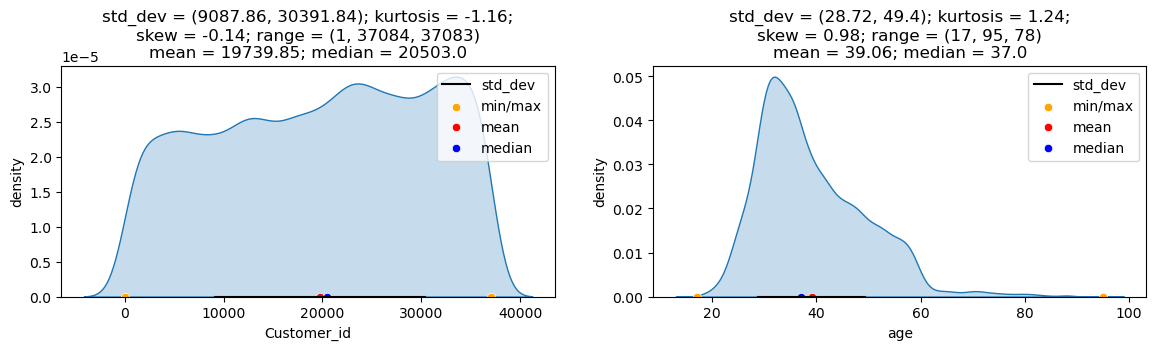

In [13]:
# Checking the stats of Customer_id and age
UVA_numeric(data,['Customer_id', 'age'])

#### Inferences to be drawn:

* **customer_id**:
     * variable is unique for every customer, Hence uniform distribution.
     * This variable does not contribute any information

* **age**:
    * The median age is 37.0, which is younger than the mean of 39.06. This suggests that the distribution is slightly skewed to the right.
    * **Most customers age between 28 to 49.**
    * skewness +0.98 : customer age is **biased towards younger age.**
    * **kurtosis = 1.24**; This means that the distribution is less peaked than a normal distribution. This suggests that there are fewer extreme outliers in the data.  
    * The range of ages is 78, which is fairly large. This means that they have a wide range of customers from different age groups.
    * The distribution of ages is skewed to the right, meaning there are more younger customers than older customers. This could mean that they are attracting a younger demographic, or that it is losing older customers.


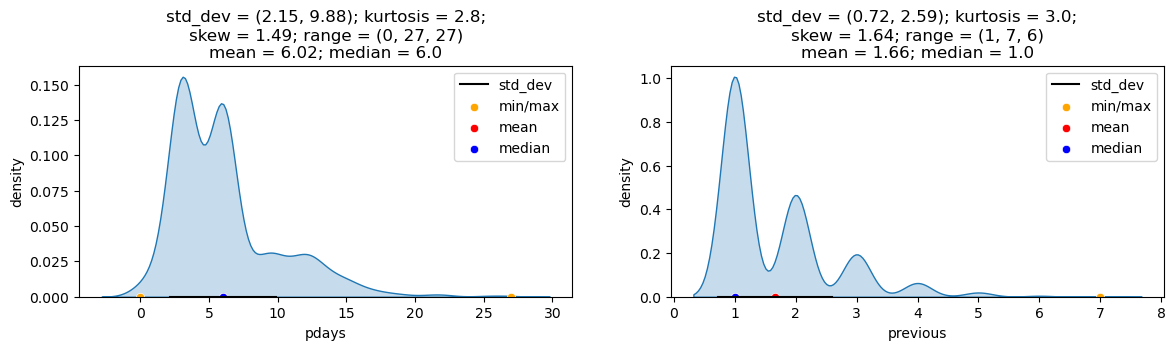

In [14]:
# Customers who are previously contacted
data1 = data[data['pdays'] != 999]
UVA_numeric(data1,['pdays','previous'])

#### Inferences to be drawn:

* **pdays**:
     * pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
     * average number of days passed after being previously contacted is 6.
     * There are customers who are previously contacted after maximum of 27 days and minimum of 0 which means twice a day.
     * The positive skewness indicates that the distribution is skewed to the right, with a longer tail on the right side. This implies that there are instances where the number of days since the last contact is much higher than the average, potentially indicating infrequent but significant gaps between contacts.


* **previous**:
    * previous: number of contacts performed before this campaign and for this client.
    * The positive skewness (1.64) suggests that the distribution of the number of contacts performed before this campaign is skewed to the right. This indicates that there may be clients with a higher number of previous contacts, potentially implying a group of clients who have been contacted more frequently in the past.
    * contacts performed before the current campaign varies between 1 and 7.
    * There are clients with a small number of previous contacts as well as those with a higher number.


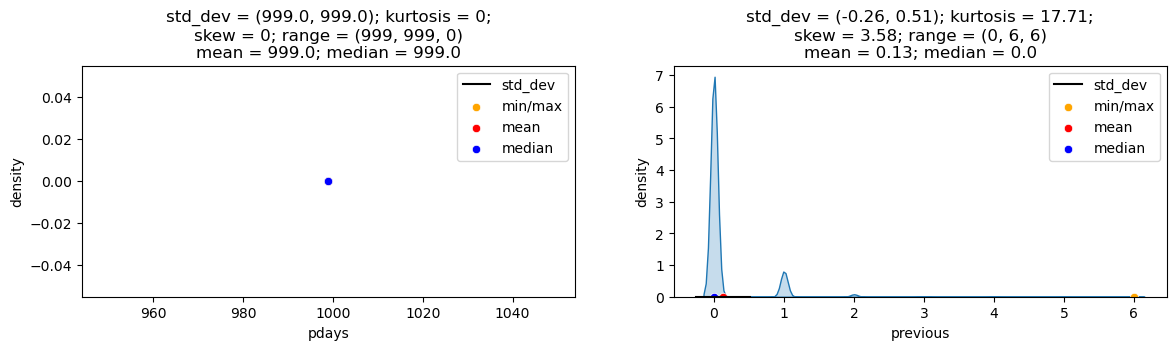

In [15]:
# Customers who are previously not contacted
data2 = data[data['pdays'] == 999]
UVA_numeric(data2, ['pdays','previous'])

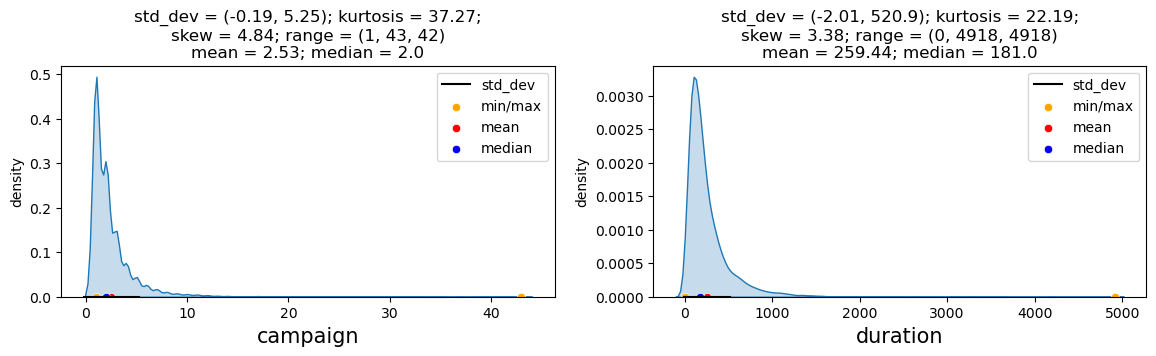

In [18]:
# Checking the stats of campaign and duration
UVA_numeric(data, ['campaign','duration'])

**Inferences to be drawn:**
* **campaign**:
     * campaign: number of contacts performed during this campaign and for this client (includes last contact)
     * The positive skewness suggests that there is a subset of clients who have a significantly higher number of contacts during the current campaign. Identifying the characteristics of this group and understanding the reasons for their increased engagement can help tailor strategies for similar clients.
     * The wide range of contacts (1 to 43) indicates the presence of different client segments with varying levels of engagement.



* **duration**:
    * Similar to the number of campaign contacts we have duration distribution which is positively skewed.
    * mean = 259.44: This tells us that the average contact duration is 259.44 seconds, which is roughly 4 minutes and 19 seconds.


-------------------------
**Consumer Price Index:** $\frac{Cost Of The Market Basket In A Given Year}{ Cost Of The Market Basket In A Base Year} * 100$

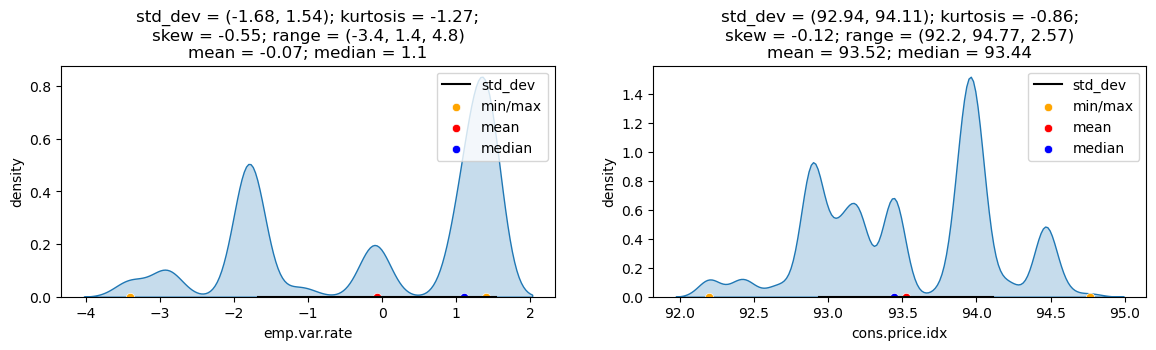

In [16]:
# Checking the stats of emp.var.rate and cons.price.idx
UVA_numeric(data,['emp.var.rate','cons.price.idx'])

- In emp.var.rate high density is observed in range of (1,2), implies that more no. of customers were contacted in good economic conditions
- As CPI is an indirect indicator of surplus funds with customers the cons.price.idx should have been right skewed for better chance at conversion

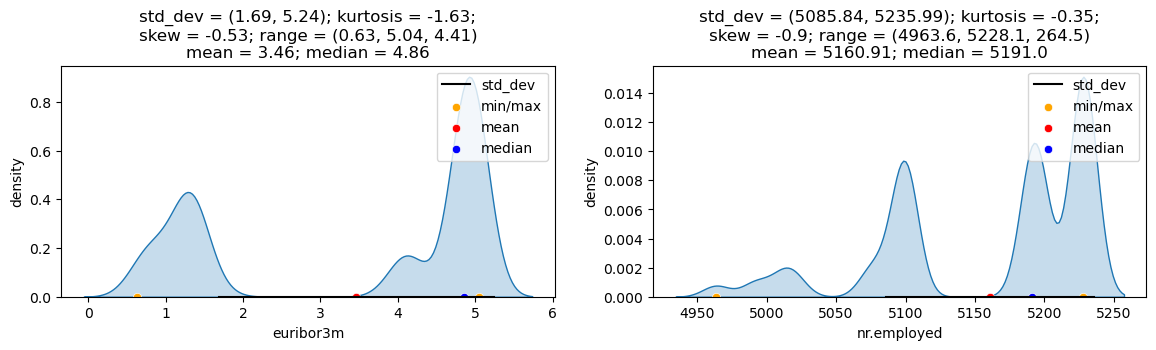

In [17]:
# Checking the stats of euribor3m and nr.employed
UVA_numeric(data,['euribor3m','nr.employed'])

- Target customers should have been more on lesser euribor3m rannge for them to feel our scheme appealing
- An upward trend in the nr.employed graph indicates that the industry is growing

## Univariate Analysis : Categorical Variables

In [21]:
# Selecting the 'object' and 'category' datatypes only
data.select_dtypes(exclude = ['int64','float64','Int64']).dtypes

job                    object
marital                object
education              object
default                object
housing                object
loan                   object
State_Code             object
City_Code              object
Postal Code          category
City_Name              object
State_Name             object
Region_Code          category
Region_Name            object
contact                object
month                  object
day_of_week            object
poutcome               object
Customer_Response      object
dtype: object

In [18]:
customer_details = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):
    size = len(var_group)
    plt.figure(figsize = (4*size, 11*size), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(3,size//3,j+1)
        sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('\n n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count), fontsize=15)

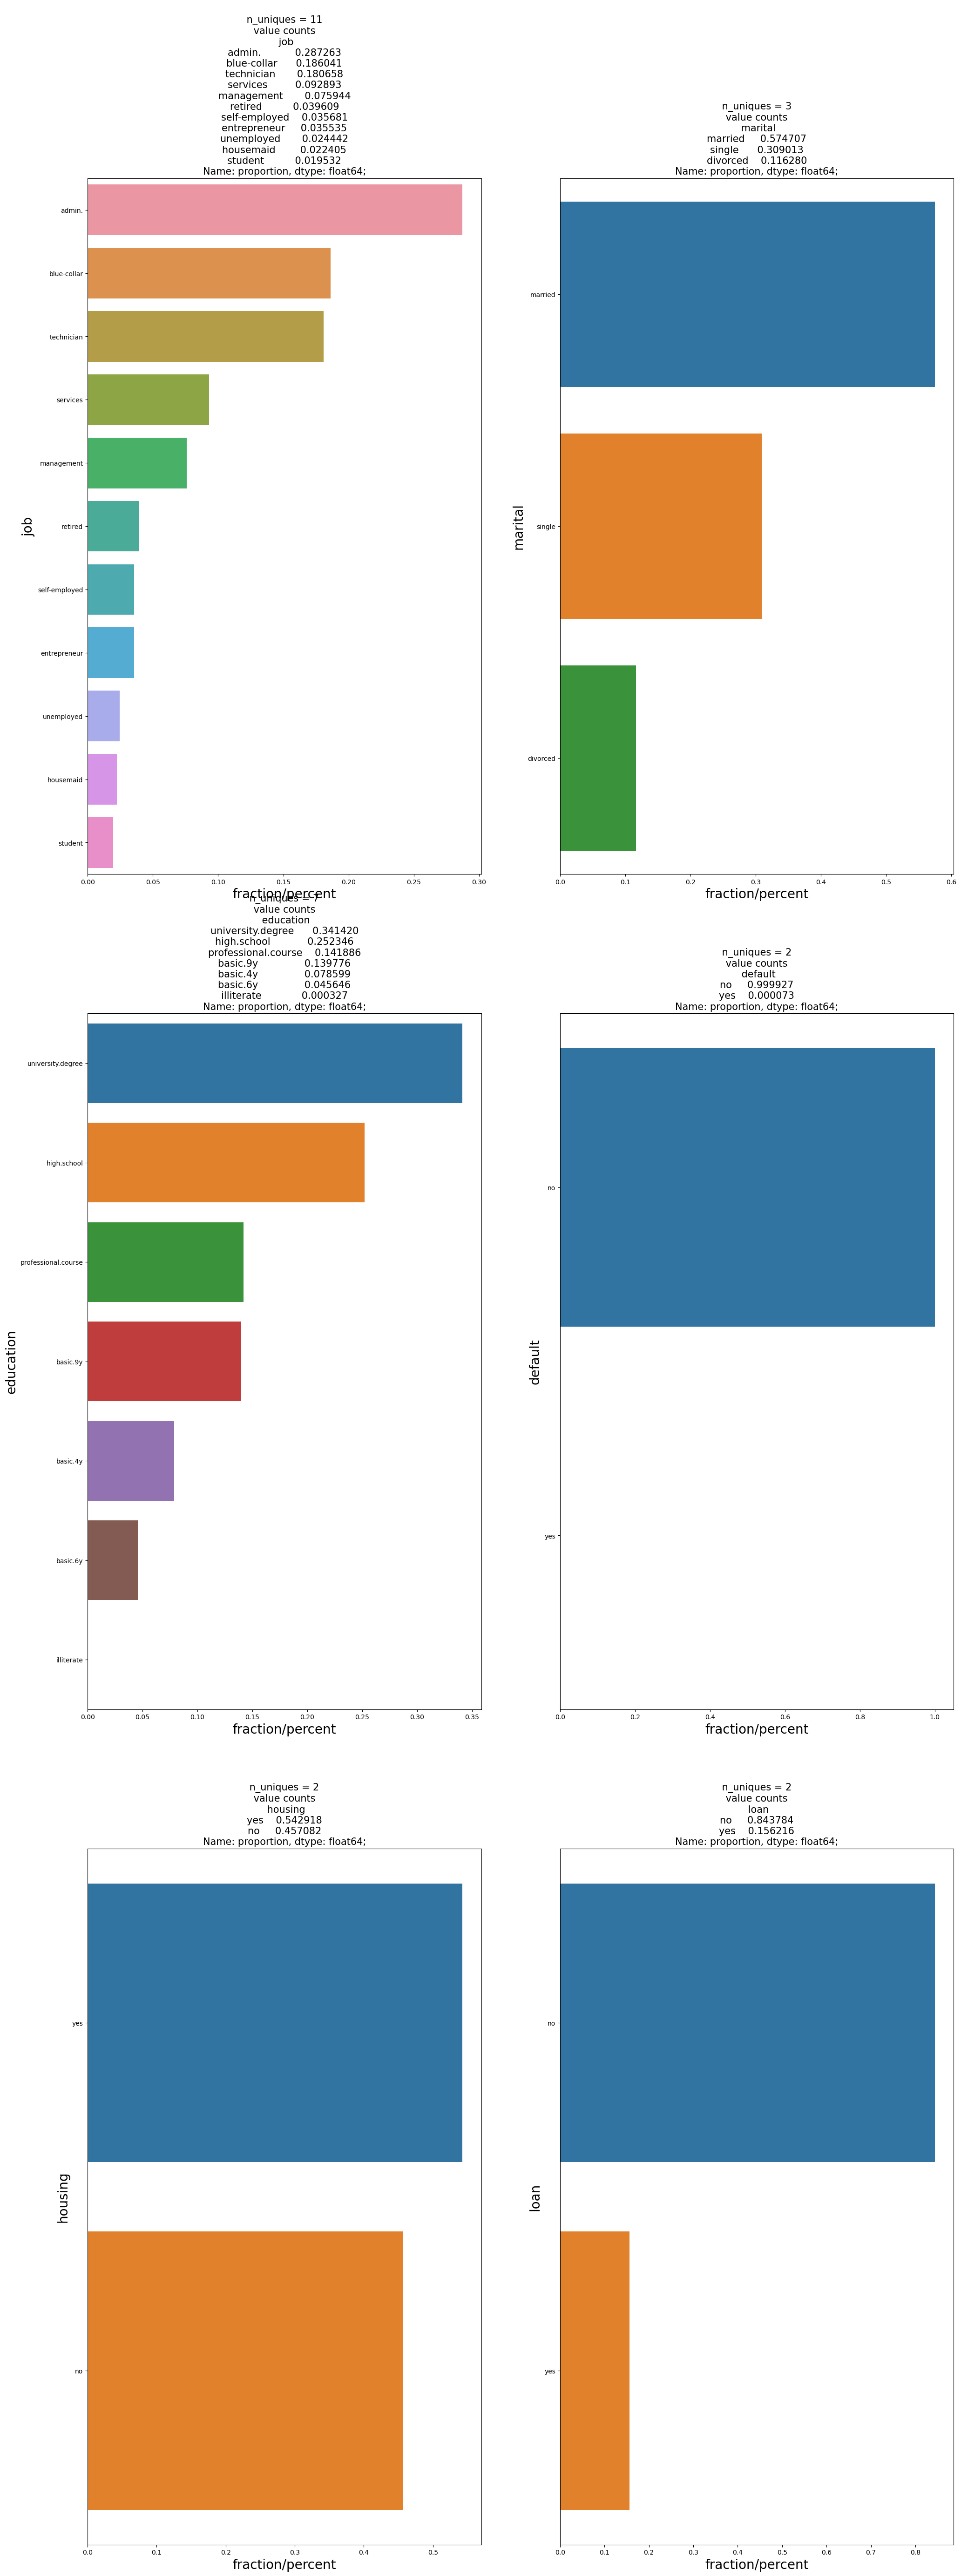

In [19]:
# Predicting the relationships with respect to the customer details
UVA_category(data, customer_details)

**Inferences to be drawn:**
* We get the same info as in the task 2.
* Majority of customers work in administrative roles (28.72%).
*  The majority of customers in the dataset are married (57.47% of customers contacted).
* A large number of customers have a university degree (34.14% of customers). 
* Only 0.0073 % customers are defaulters.
* 0.54% of contacted customers have housing loan and 0.84% of customers do not have personal loan.

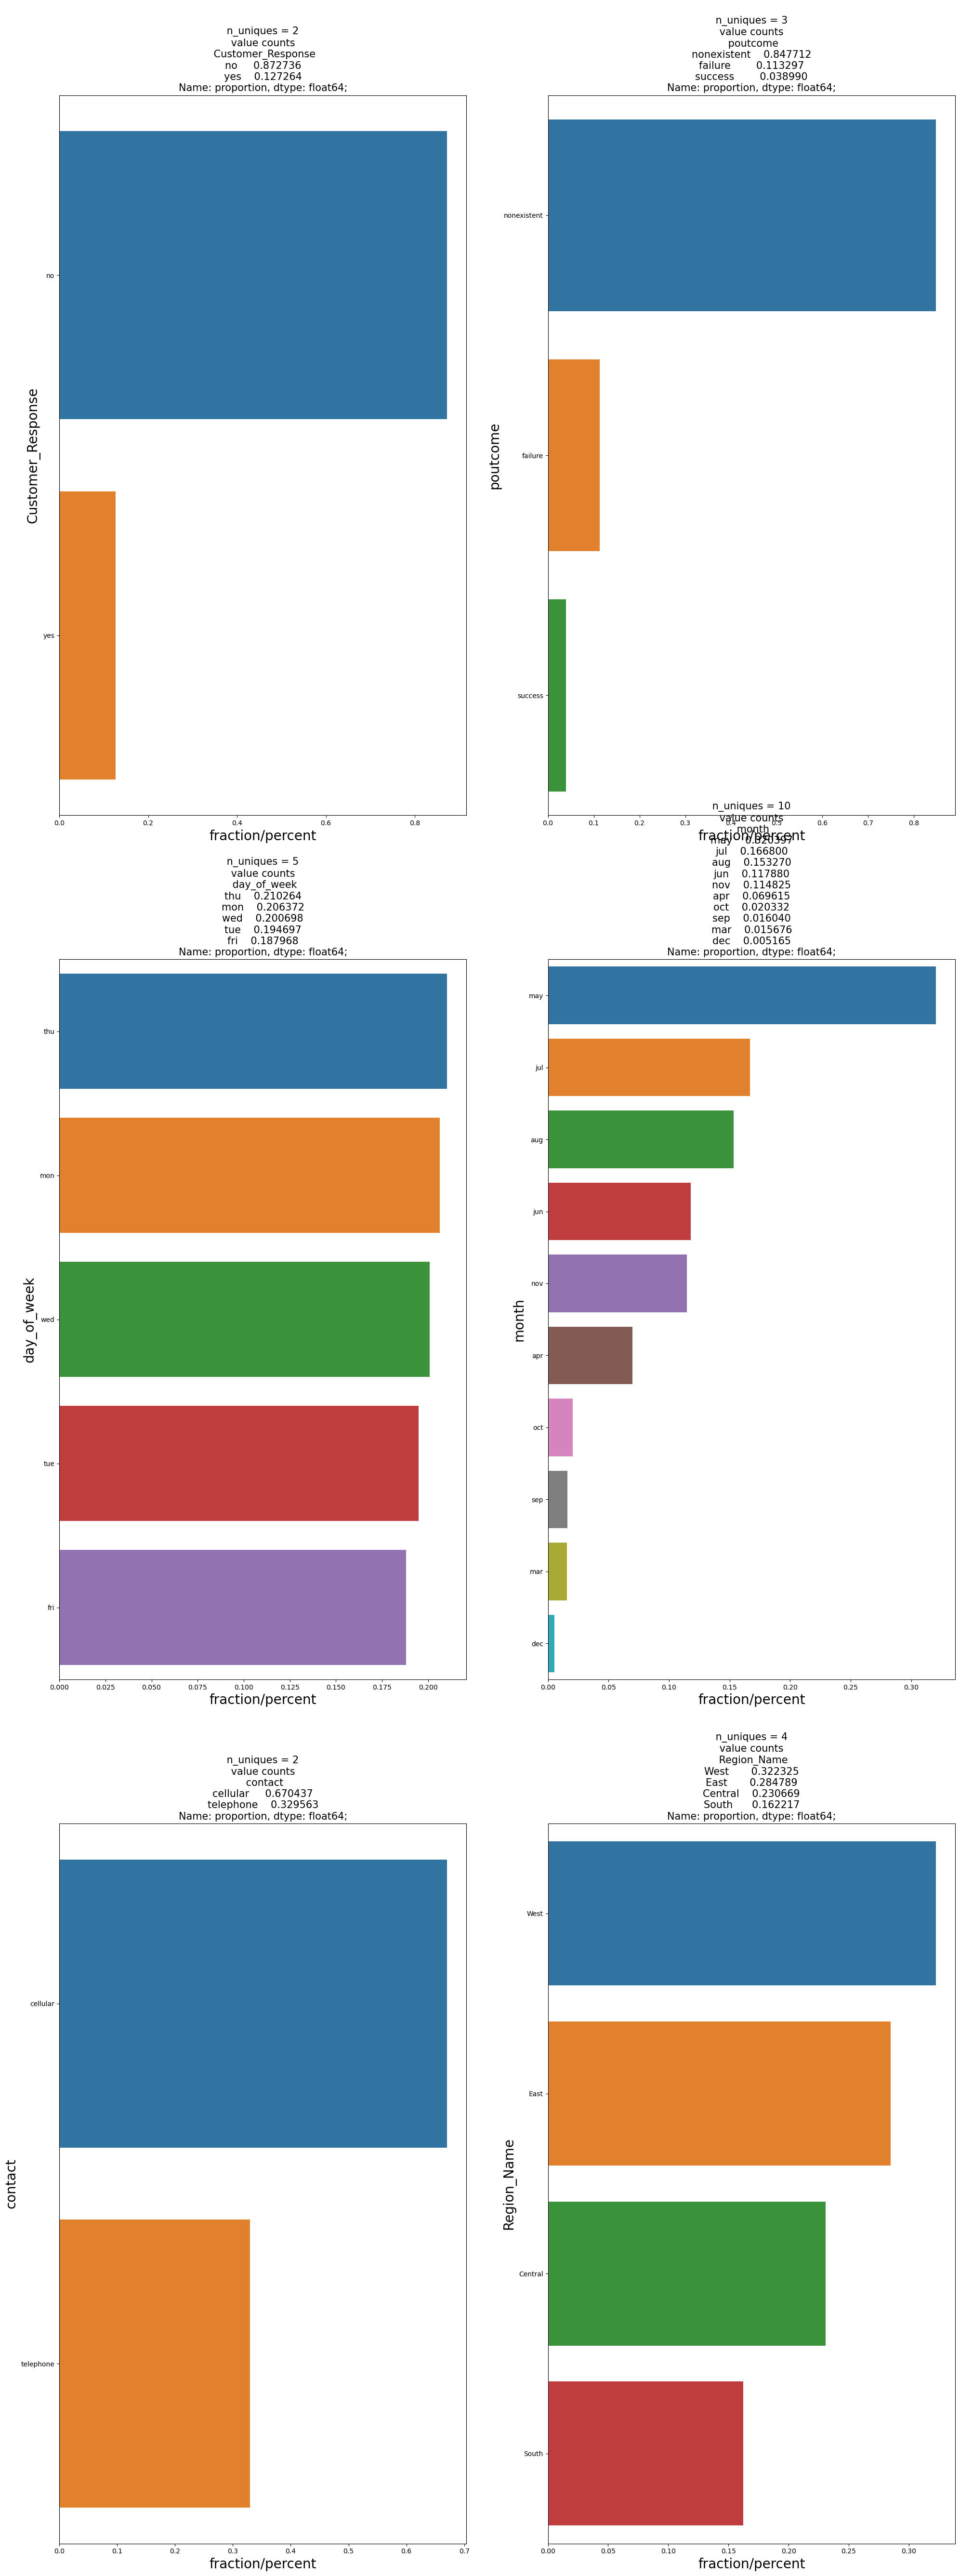

In [20]:
# Predicting the relationships with respect to the contact details
contact_details = ['Customer_Response', 'poutcome', 'day_of_week', 'month', 'contact', 'Region_Name']

UVA_category(data, contact_details)

* Most of the time we got respose as no for our term deposit scheme.
* Success rate for our campaign is 3.8%. 
* For most of the customers last contacted day of week is thursday
* For most of the customers last contacted month is may
* We have received a good response from cellular mode compared to telephone mode.
* 32.23% of the population are from west region. 

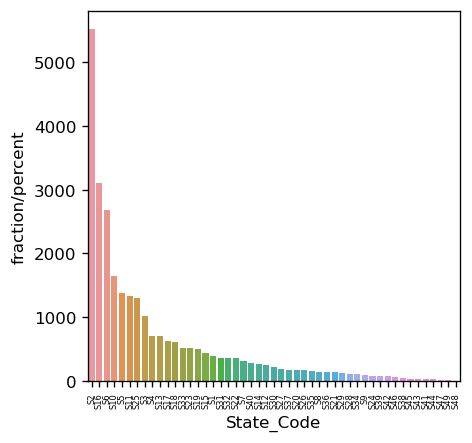

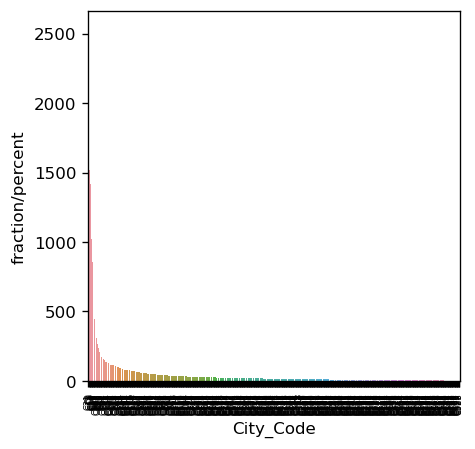

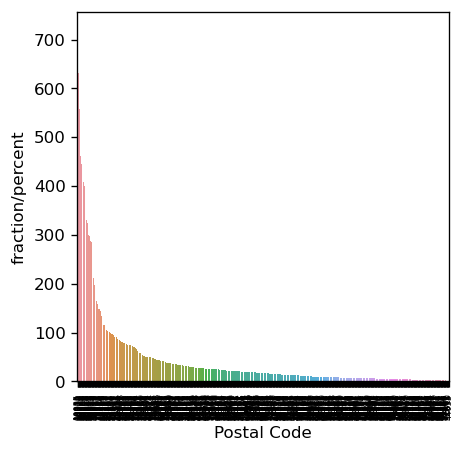

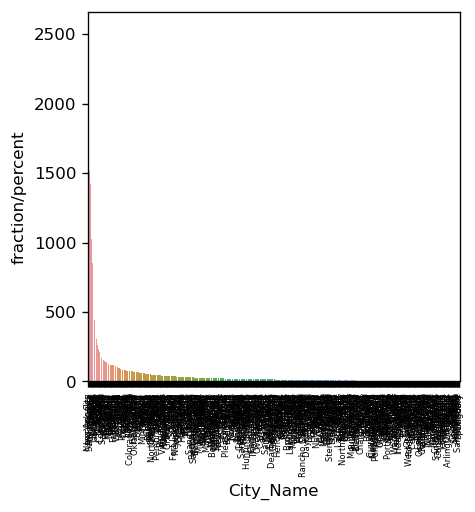

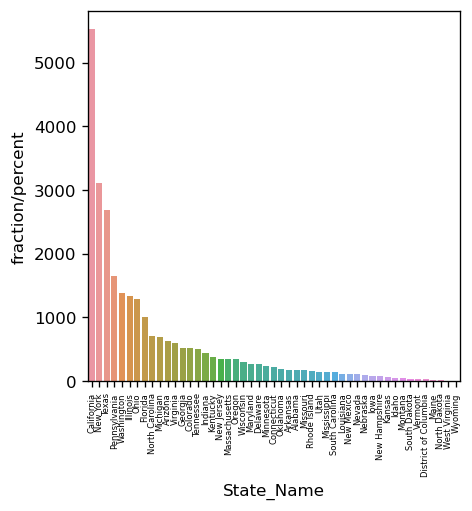

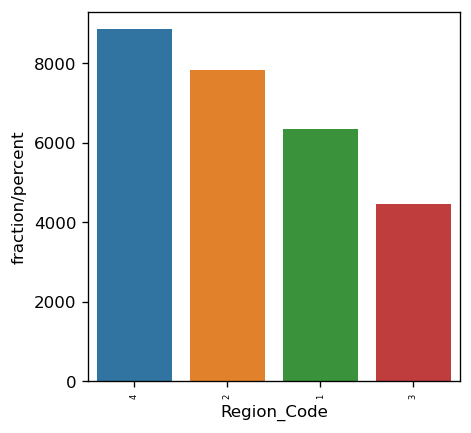

In [22]:
# Predicting the relationships with respect to the Region Details
region_details = ['State_Code', 'City_Code', 'Postal Code', 'City_Name', 'State_Name', 'Region_Code']

for i in region_details:
    
    #Plotting "branch_code"
    plt.figure(figsize = (4,4), dpi = 120)
    Region_count = data[i].value_counts()
    
    # Printing a bar plot
    sns.barplot(x= Region_count.index, y = Region_count , order = Region_count.index)
    
    plt.xlabel(i)
    plt.ylabel('fraction/percent')
    plt.xticks(rotation = 90, fontsize = 5)

**Inferences to be drawn:**

- city_code, postal_code, city_name has too many categories.
- California is the city from where we have our majority of contacted customer.
- We have most of the customers from region_code 4.

## Bivariate Analysis : Continous - Continous

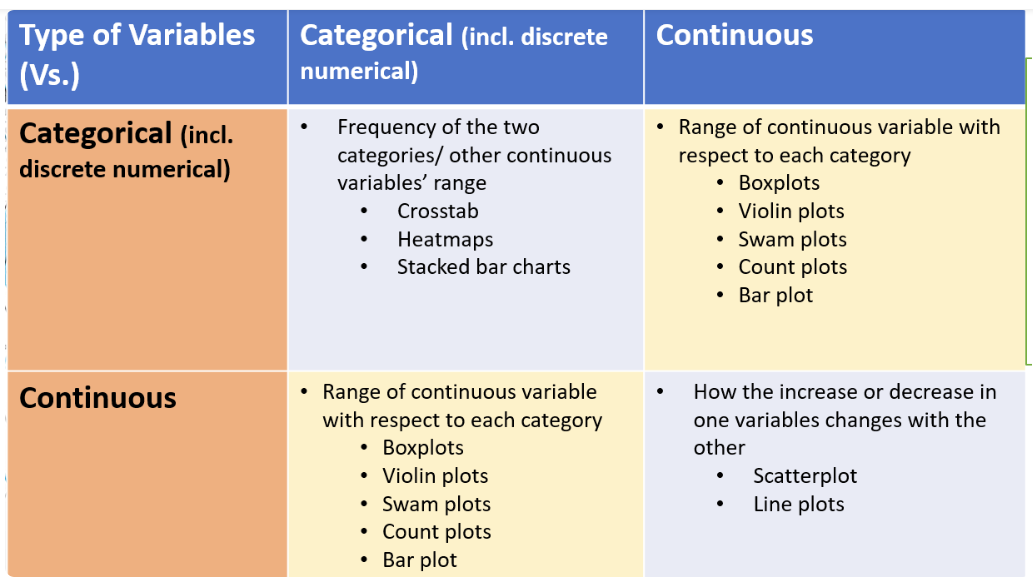

In [24]:
# Isolating only numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Customer_id         int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
dtype: object

Text(0.5, 1.0, 'Heatmap')

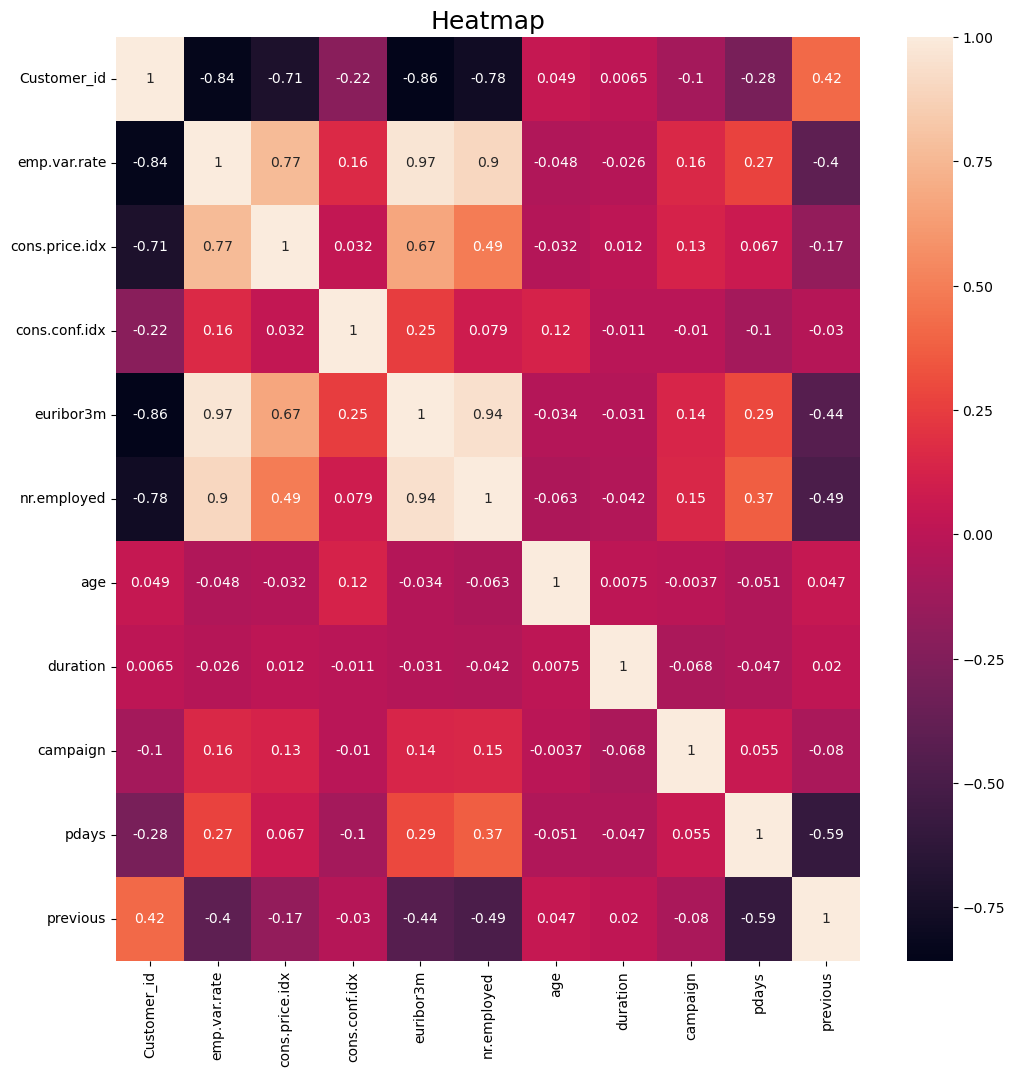

In [27]:
# plotting heatmap
plt.figure(figsize=(12, 12))
correlation = numerical.corr(method = 'pearson')

sns.heatmap(correlation, annot=True)
plt.title('Heatmap', fontsize = 18)

- Too many variables with insignificant correlation.
- Major correlation lies between:
    1. emp.var.rate and euribor3m
    2. nr.employed and euribor3m
    3. emp.var.rate and nr.employed
-------

<Figure size 896x672 with 0 Axes>

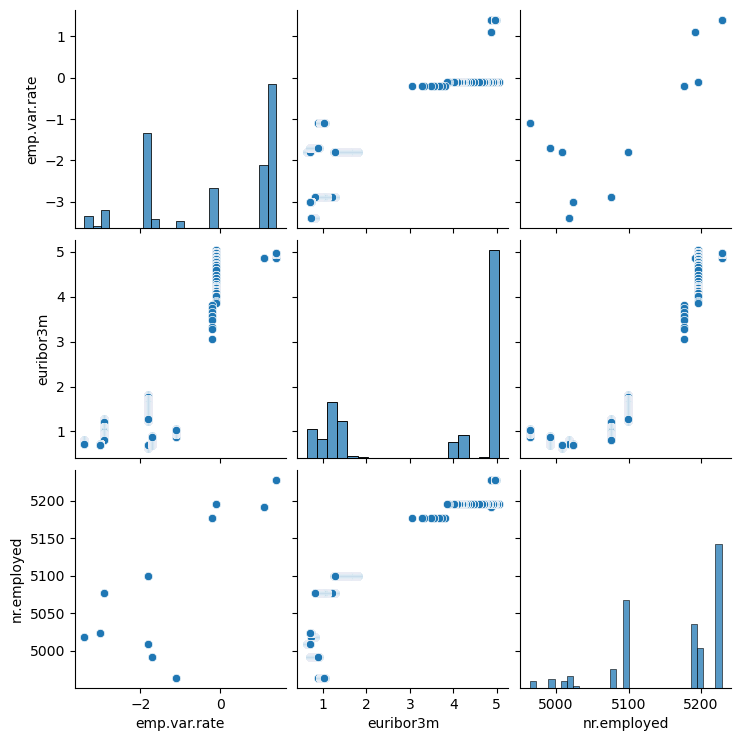

In [30]:
# Scatter plot for related variables
socio_economic_variables = ['emp.var.rate', 'euribor3m', 'nr.employed']

plt.figure(dpi = 140)

# print a pairplot checking the relationships
sns.pairplot(data[socio_economic_variables])

Therefore, this validates the correlation between these variables.

----------------
## Bivariate : Categorical-Categorical

In [31]:
# Plotting a categorical plot
def BVA_categorical_plot(data, tar, cat):
    
    # isolating the variables
    data = data[[cat,tar]][:]
    
    # plotting grouped plot
    sns.countplot(x=cat, hue = tar, data = data)
    plt.title('Countplot')
    plt.xticks(rotation=90)

    # plotting percent stacked bar plot
    # sns.catplot(ax, kind='stacked')
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title = str(ax1))
    int_level = data[cat].value_counts()

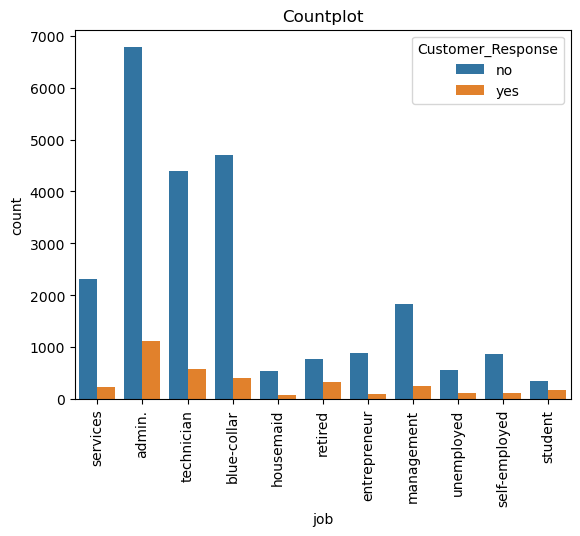

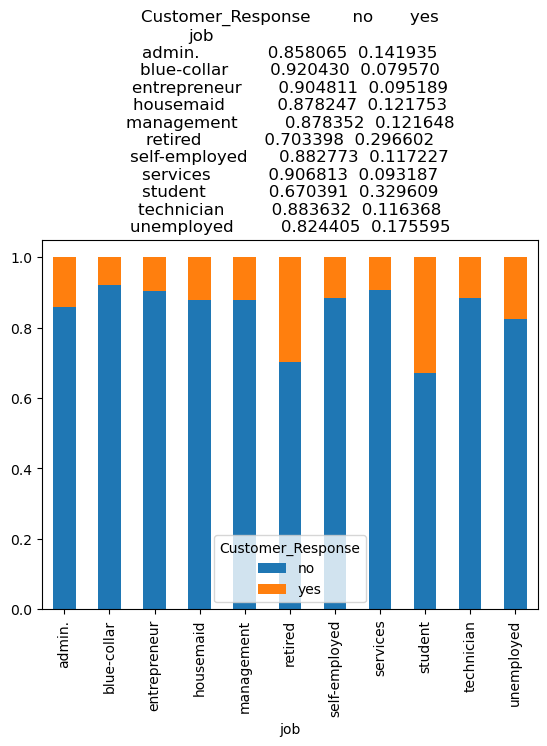

In [32]:
# Creating a plot between the Customer_Response and job
BVA_categorical_plot(data, 'Customer_Response', 'job')

**Inferences to be drawn:**

- We see that Customer response depends on which job they are in. 
- **32%** of students are interested in term deposit and **29%** of retired customers are also seems to be interested.
--------

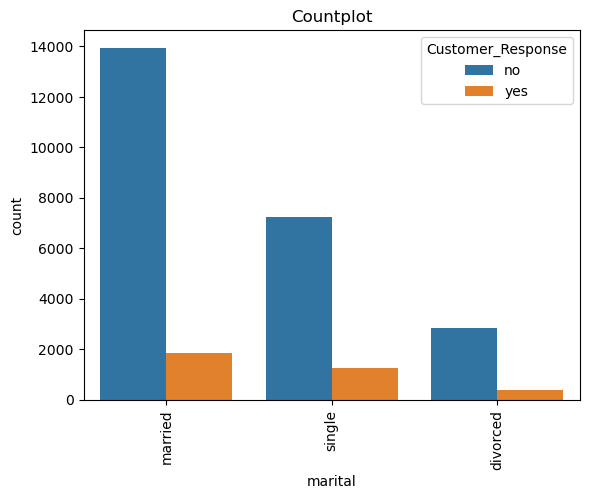

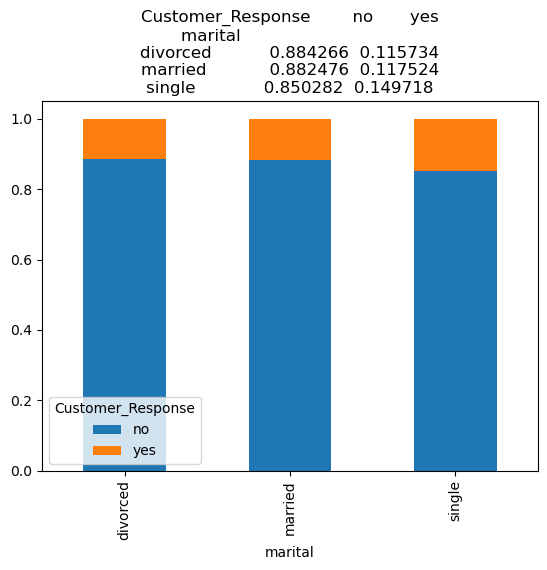

In [33]:
# Creating a plot between the Customer_Response and marital
BVA_categorical_plot(data, 'Customer_Response', 'marital')

**Inferences to be drawn:**

- Customer Response clearly depends on marital status.
- Those who are single has comparitively better resonse to the campaign
-------

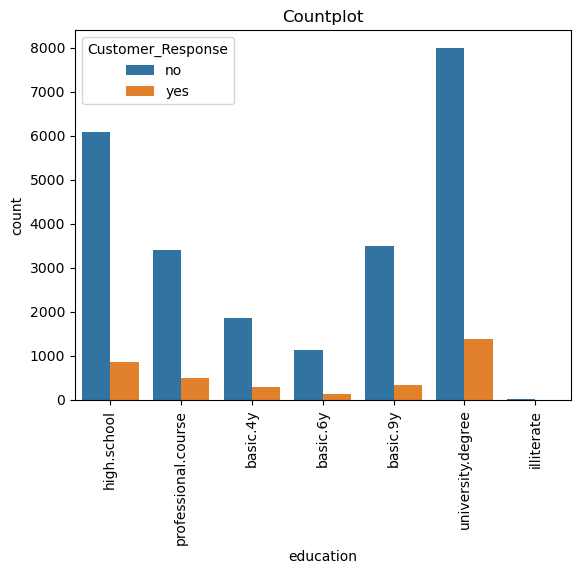

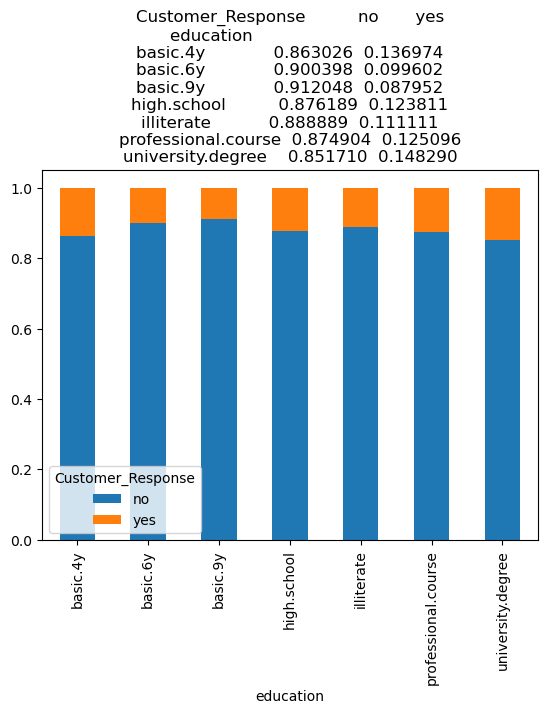

In [32]:
# Creating a plot between the Customer_Response and education
BVA_categorical_plot(data, 'Customer_Response', 'education')

**Inferences to be drawn:**

- Customer Response depends on education level as well.
- Our customer population with university degree has good number of educated customers, their response to the campaign is also good.
- Hence, we should focus on well educated customer.
------------------

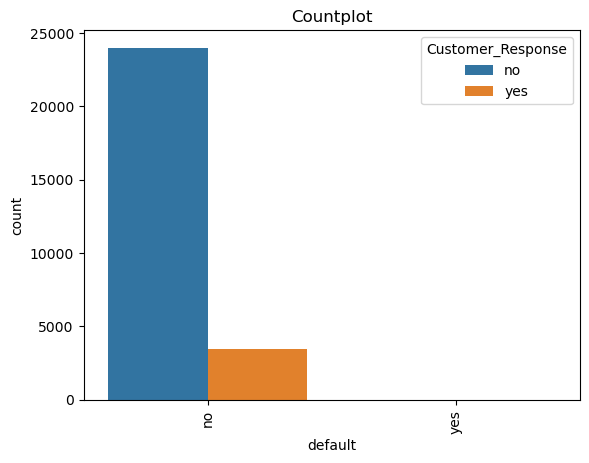

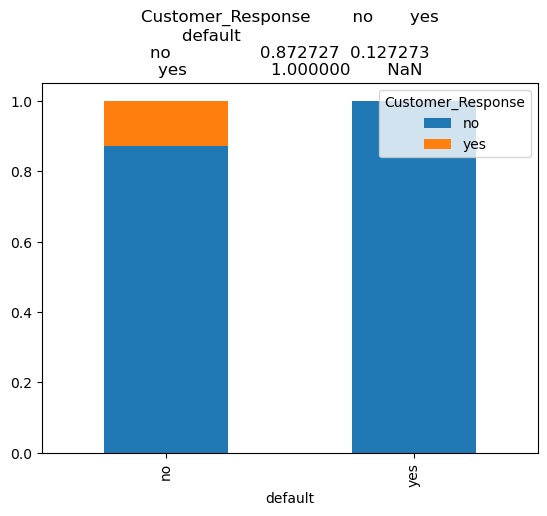

In [34]:
# Creating a plot between the Customer_Response and default
BVA_categorical_plot(data, 'Customer_Response', 'default')

**Inferences to be drawn:**

- We know from our hypothesis testing that default variable does not have a significant association to the customer response.
- With the available data we are unable to say anything about their dependecy.
------------------------

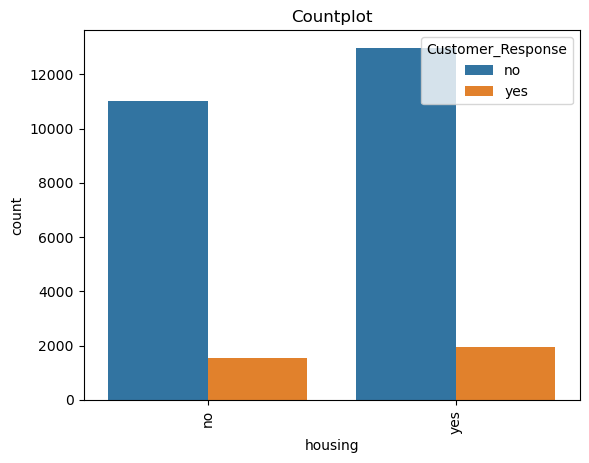

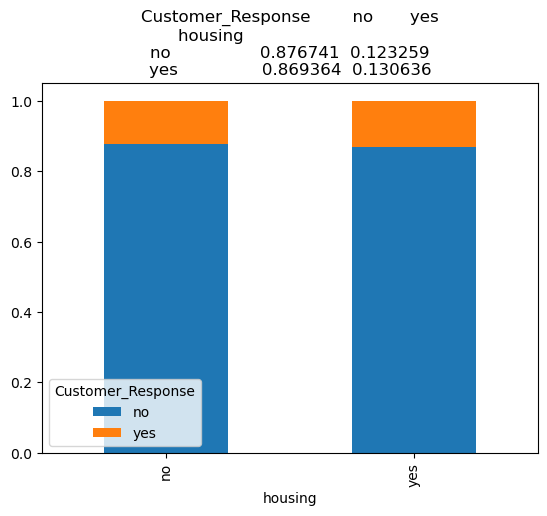

In [34]:
# Creating a plot between the Customer_Response and housing
BVA_categorical_plot(data, 'Customer_Response', 'housing')

**Inferences to be drawn:** There is no significance association between housing and customer response to the campaign.

-----

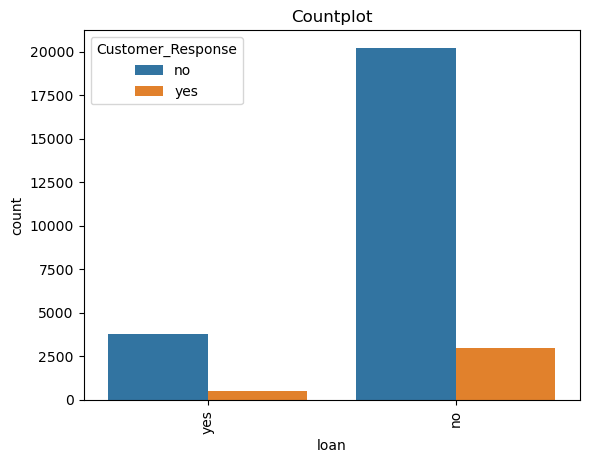

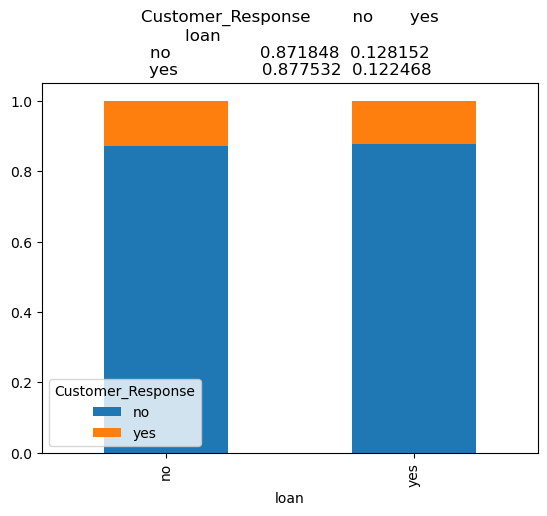

In [35]:
# Creating a plot between the Customer_Response and loan
BVA_categorical_plot(data, 'Customer_Response', 'loan')

* Loan and customer response are also not associated.

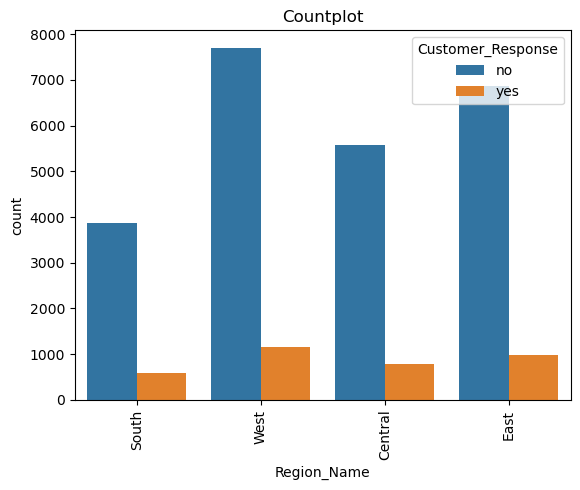

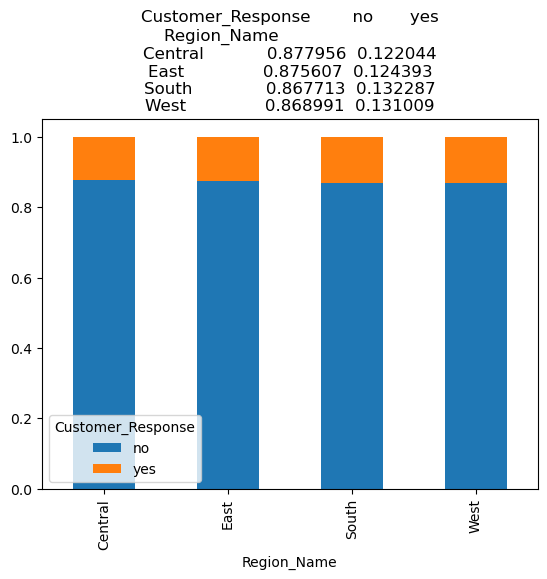

In [36]:
# Creating a plot between the Customer_Response and Region_Name
BVA_categorical_plot(data, 'Customer_Response', 'Region_Name')

**Inferences to be drawn:**
- There is not much difference in the percentage of 'yes' in each of the region.
- region has no association with customer response.
--------------

In [35]:
# Segregating customers into segments based on age
Response = data[['Customer_Response','age']][:]

Response['age_group'] = 'str'
Response['age_group'][Response['age']>=80] = 'very old'
Response['age_group'][(Response['age']<80) & (Response['age']>=60)] = 'senior citizen'
Response['age_group'][(Response['age']<60) & (Response['age']>=18)] = 'adult'
Response['age_group'][Response['age']<18] = 'young'

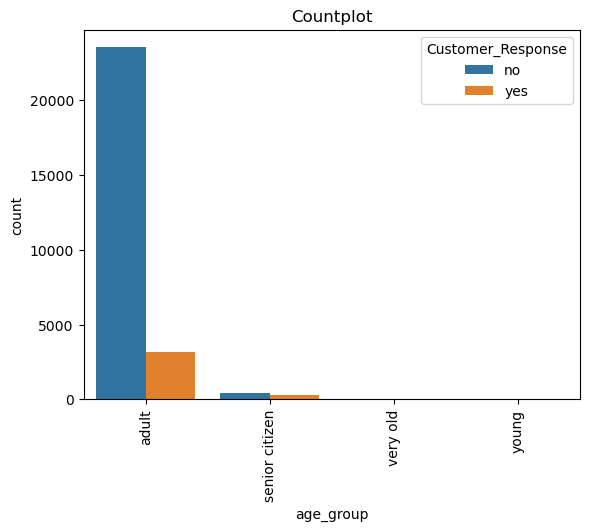

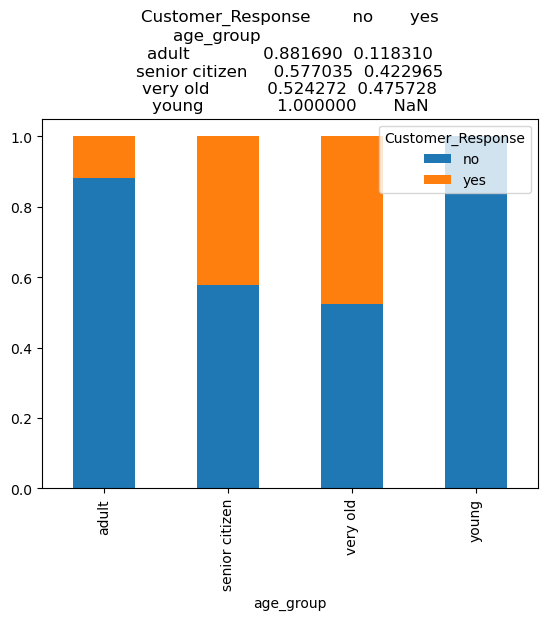

In [36]:
# Creating a plot between the Customer_Response and age_group
BVA_categorical_plot(Response, 'Customer_Response', 'age_group')

**Inferences to be drawn:**: There is a clear association between age group and customer response.

------

## Bivariate Analysis: Continuous-Categorical variables

In [37]:
# Creating a function for bivariate analysis for Continuous-Categorical variables
def bivariate_cont_cat(data, tar, cont):
    
    sns.set_style('whitegrid')
    box_plot = sns.boxplot(x=tar, y=cont, data=data)
    
    plt.title('Boxplot')
    
    medians = data.groupby([tar])[cont].median()
    vertical_offset = data[cont].median() * 0.05

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

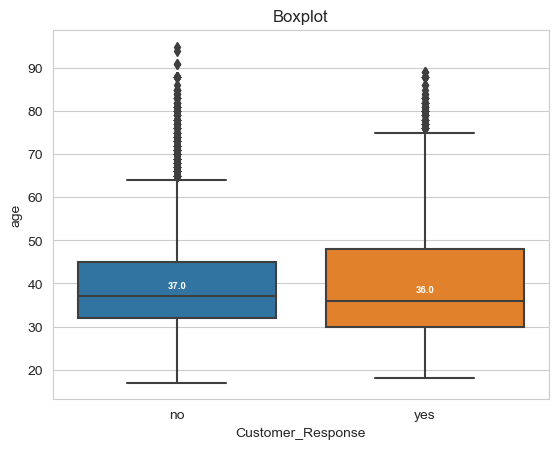

In [38]:
# Create boxplots for Customer_Response and Age
bivariate_cont_cat(data,'Customer_Response','age')

- The outliers are a indication of customers contacted outside the range of ideal target age

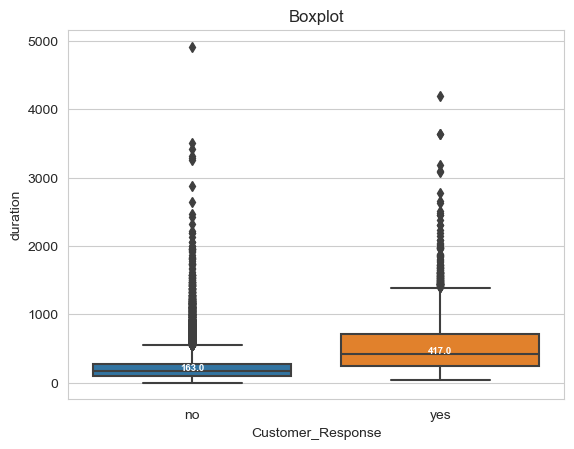

In [39]:
# Create boxplots for Customer_Response and duration
bivariate_cont_cat(data,'Customer_Response','duration')

- Median of yes is higher, indicating customers take information if they are interested in the scheme and knowing more about scheme details
- Outliers might be required for customers with more querries
- Outliers in the customers with negative response may indicate one of the following:
    - Unpleasant interraction with the firm
    - Scheme not explained clearly
    - Multiple contacts

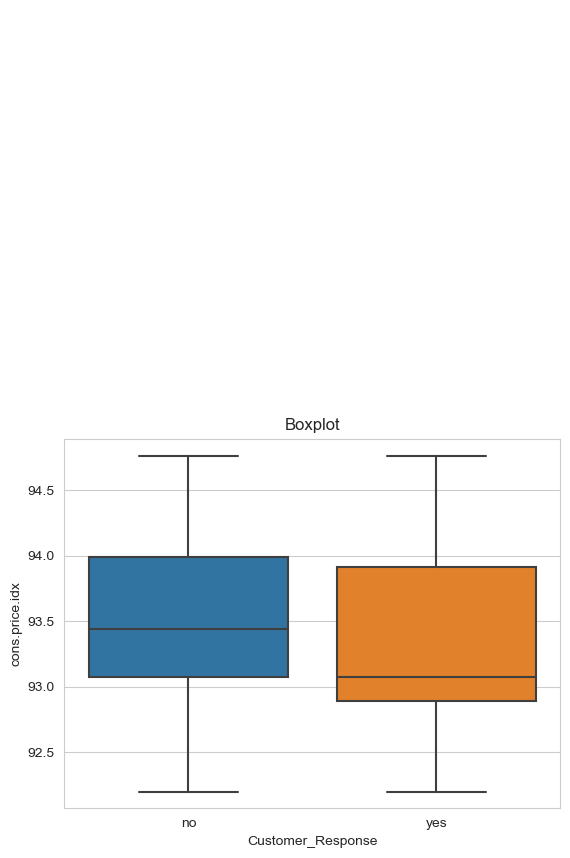

In [45]:
# Create boxplots for Customer_Response and cons.price.idx
bivariate_cont_cat(data,'Customer_Response','cons.price.idx')

- Meadian for customers with positive response is low, indicating the scheme appeals to customers with high liquidity

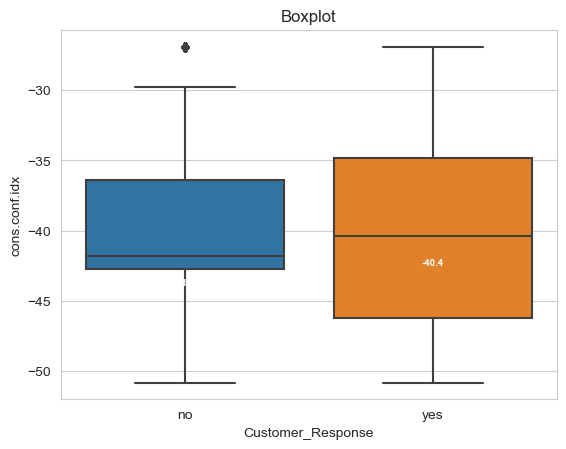

In [46]:
# Create boxplots for Customer_Response and cons.conf.idx
bivariate_cont_cat(data,'Customer_Response','cons.conf.idx')

- No definitive inference can be drawn as the cons.conf.idx for all target customers is negative

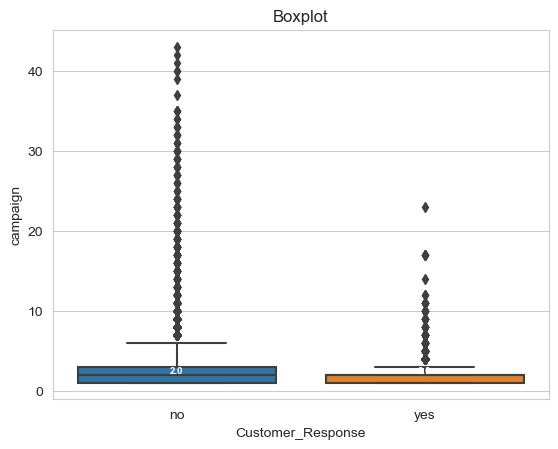

In [47]:
# Create boxplots for Customer_Response and campaign
bivariate_cont_cat(data,'Customer_Response','campaign')

- High outliers in this indicates that there is a possibility that campaign strategy in terms of contacting customers is not appropriately designed
- This might be due to agents spamming the target customers to meet their target no. of calls
- Transparent targets which are achievable can reduce this to a good extent

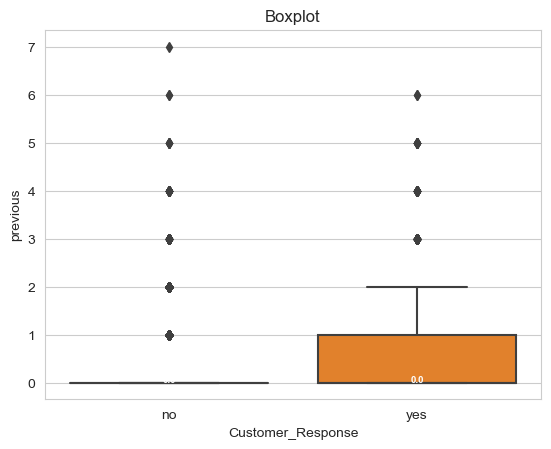

In [49]:
# Create boxplots for Customer_Response and previous
bivariate_cont_cat(data,'Customer_Response','previous')

- Most of the customers with positive response are not contacted earlier
- This indicates if we target new diverse range of customers we have better chances to convert

## Multivariate Analysis

In [50]:
# A function to create a grouped boxplot
def grouped_Box_Plot(data, cont, cat1, cat2):
    
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    
    plt.title('Boxplot')
    plt.xticks(rotation=90)

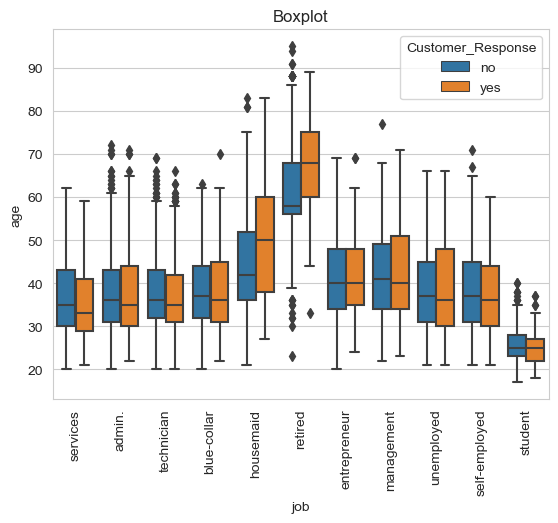

In [51]:
# Plotting for age, job and customer_response
grouped_Box_Plot(data,'age', 'job', 'Customer_Response')

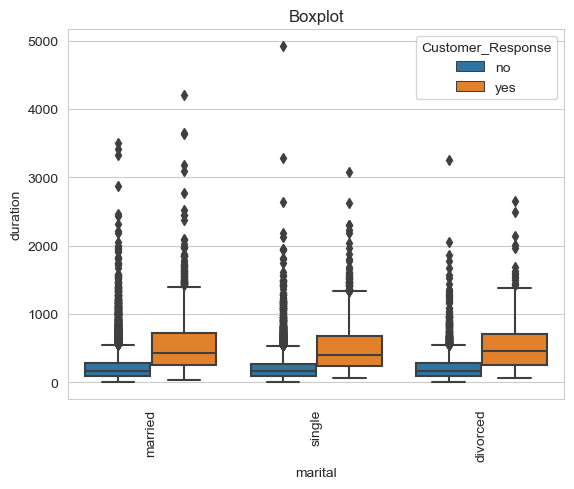

In [52]:
# Plotting for marital, duration and customer_response
grouped_Box_Plot(data,'duration','marital', 'Customer_Response')

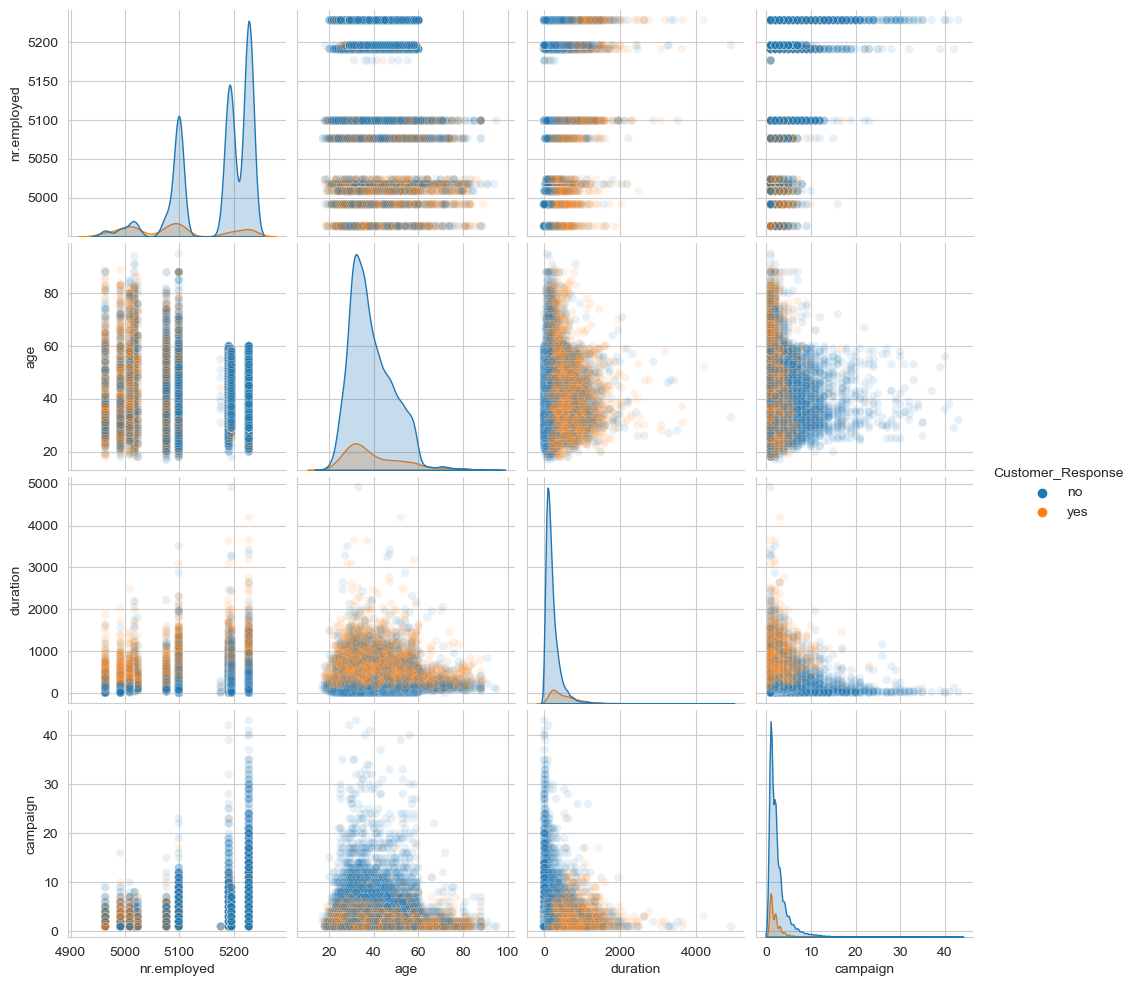

In [54]:
numerical_cols = ['nr.employed', 'age', 'duration', 'campaign']

# Printing a pairplot of the numerical columns
sns.pairplot(data, vars = numerical_cols, hue ='Customer_Response', plot_kws={'alpha':0.1})
plt.show()

## Missing Value Treatment

Here, we are treating the missing values (if any) and imputing them with relevant stats.

In [55]:
# Importing the data again
data1 = pd.read_csv('Capstone.csv')
data1.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,job,marital,education,...,Region_Name,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Customer_Response
0,1,1.1,93.994,-36.4,4.857,5191.0,56,services,married,high.school,...,South,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,1.1,93.994,-36.4,4.857,5191.0,45,services,married,basic.9y,...,South,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,1.1,93.994,-36.4,4.857,5191.0,59,admin.,married,professional.course,...,West,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,1.1,93.994,-36.4,4.857,5191.0,41,blue-collar,married,unknown,...,South,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,1.1,93.994,-36.4,4.857,5191.0,24,technician,single,professional.course,...,South,telephone,may,mon,380,1,999,0,nonexistent,no


In [56]:
# Checking the shape of the data
data1.shape

(37084, 29)

In [57]:
# Checking for any null values
data1.isna().sum()

Customer_id          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
State_Code           0
City_Code            0
Postal Code          0
City_Name            0
State_Name           0
Region_Code          0
Region_Name          0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Customer_Response    0
dtype: int64

In [58]:
# Checking the 'unknown' values
data1.apply(lambda x: x[x == 'unknown'].count())

Customer_id             0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
age                     0
job                   306
marital                72
education            1549
default              7700
housing               882
loan                  882
State_Code              0
City_Code               0
Postal Code             0
City_Name               0
State_Name              0
Region_Code             0
Region_Name             0
contact                 0
month                   0
day_of_week             0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
Customer_Response       0
dtype: int64

In [59]:
# Creating a list of all the columns having 'unknown' values
missing = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Imputing function and replacing the value with mode
def impute(df, col):
    df[col].replace('unknown', (df[col].value_counts()).index[0], inplace = True)

# Impute the data
for i in missing:
    impute(data1, i)

In [60]:
# Checking the 'unknown' values again
data1.apply(lambda x: x[x == 'unknown'].count())

Customer_id          0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
State_Code           0
City_Code            0
Postal Code          0
City_Name            0
State_Name           0
Region_Code          0
Region_Name          0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Customer_Response    0
dtype: int64

In [61]:
# Saving new data into imputed.csv
data1.to_csv('imputed.csv', index = False)

## Data Preprocessing

The stage of preprocessing. Here we are converting the data into a cleaned data using apt steps. 

In [62]:
# Loading the data into new_data
new_data = pd.read_csv('imputed.csv')
new_data.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,job,marital,education,...,Region_Name,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Customer_Response
0,1,1.1,93.994,-36.4,4.857,5191.0,56,services,married,high.school,...,South,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,1.1,93.994,-36.4,4.857,5191.0,45,services,married,basic.9y,...,South,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,1.1,93.994,-36.4,4.857,5191.0,59,admin.,married,professional.course,...,West,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,1.1,93.994,-36.4,4.857,5191.0,41,blue-collar,married,university.degree,...,South,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,1.1,93.994,-36.4,4.857,5191.0,24,technician,single,professional.course,...,South,telephone,may,mon,380,1,999,0,nonexistent,no


In [63]:
# Checking the shape
new_data.shape

(37084, 29)

In [64]:
# Dropping unnecessary columns since they don't contribute to the performance
new_data = new_data.drop(['Customer_id', 'State_Code', 'City_Code', 'Postal Code', 'City_Name', 
                          'State_Name', 'Region_Code', 'Region_Name'], axis = 1)

new_data.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,job,marital,education,default,...,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Customer_Response
0,1.1,93.994,-36.4,4.857,5191.0,56,services,married,high.school,no,...,yes,telephone,may,mon,307,1,999,0,nonexistent,no
1,1.1,93.994,-36.4,4.857,5191.0,45,services,married,basic.9y,no,...,no,telephone,may,mon,198,1,999,0,nonexistent,no
2,1.1,93.994,-36.4,4.857,5191.0,59,admin.,married,professional.course,no,...,no,telephone,may,mon,139,1,999,0,nonexistent,no
3,1.1,93.994,-36.4,4.857,5191.0,41,blue-collar,married,university.degree,no,...,no,telephone,may,mon,217,1,999,0,nonexistent,no
4,1.1,93.994,-36.4,4.857,5191.0,24,technician,single,professional.course,no,...,no,telephone,may,mon,380,1,999,0,nonexistent,no


In [65]:
# Checking the shape after dropping new columns
new_data.shape

(37084, 21)

In [66]:
# Drop the duplicates in the data
new_data.drop_duplicates(inplace = True)

In [67]:
# Checking the new shape
new_data.shape

(37072, 21)

In [68]:
# Checking the info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37072 entries, 0 to 37083
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emp.var.rate       37072 non-null  float64
 1   cons.price.idx     37072 non-null  float64
 2   cons.conf.idx      37072 non-null  float64
 3   euribor3m          37072 non-null  float64
 4   nr.employed        37072 non-null  float64
 5   age                37072 non-null  int64  
 6   job                37072 non-null  object 
 7   marital            37072 non-null  object 
 8   education          37072 non-null  object 
 9   default            37072 non-null  object 
 10  housing            37072 non-null  object 
 11  loan               37072 non-null  object 
 12  contact            37072 non-null  object 
 13  month              37072 non-null  object 
 14  day_of_week        37072 non-null  object 
 15  duration           37072 non-null  int64  
 16  campaign           37072 no

In [69]:
# Replacing the columns into '0' and '1', and converting into numerical data and categorical data
new_data['Customer_Response'] = new_data['Customer_Response'].map({'no':0, 'yes':1}).astype('object')
new_data['poutcome'] = new_data['poutcome'].map({'nonexistent':0, 'failure':0, 'success':1}).astype('object')
new_data['contact'] = new_data['contact'].map({'cellular': 1, 'telephone': 0}).astype('object') 
new_data['loan'] = new_data['loan'].map({'yes': 1, 'no' : 0}).astype('object')
new_data['housing'] = new_data['housing'].map({'yes': 1, 'no' : 0}).astype('object')
new_data['default'] = new_data['default'].map({'no': 1, 'yes': 0}).astype('object')

new_data['pdays'] = new_data['pdays'].replace(999, 0)
new_data['euribor3m'] = new_data['euribor3m'].astype('uint8')
new_data['campaign'] = new_data['campaign'].astype('uint8')

In [70]:
# Checking the converted data again
new_data.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,job,marital,education,default,...,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Customer_Response
0,1.1,93.994,-36.4,4,5191.0,56,services,married,high.school,1,...,1,0,may,mon,307,1,0,0,0,0
1,1.1,93.994,-36.4,4,5191.0,45,services,married,basic.9y,1,...,0,0,may,mon,198,1,0,0,0,0
2,1.1,93.994,-36.4,4,5191.0,59,admin.,married,professional.course,1,...,0,0,may,mon,139,1,0,0,0,0
3,1.1,93.994,-36.4,4,5191.0,41,blue-collar,married,university.degree,1,...,0,0,may,mon,217,1,0,0,0,0
4,1.1,93.994,-36.4,4,5191.0,24,technician,single,professional.course,1,...,0,0,may,mon,380,1,0,0,0,0


**Outlier Treatment:** Checking whether there are any outliers in the data or not

In [71]:
# Creating a function that returns a dataframe after treating the ouliers
def outlier_treatment(df, col, method = 'quartile', strategy='mean'):
    
    # As mean is the best rep we gave median as strategy
    col_data = df[col]
    
    if method == 'quartile':
        
        # Checking outliers with the help of IQR 
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.5)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_limit = q1-1.5*iqr          
        upper_limit = q3+1.5*iqr
        
        col_mean = df[col].mean()
        
    # With the help of standard dev
    elif method == 'std_dev':
        
        col_mean = df[col].mean()
        col_std_dev = df[col].std()
        lower_limit = col_mean - 2*col_std_dev
        upper_limit = col_mean + 2*col_std_dev
    
    outliers = df.loc[(col_data < lower_limit) | (col_data > upper_limit), col]
    outliers_density = len(outliers) / len(df)
    
    # If stratergy is median, then IQR, else the column mean
    if strategy == 'median':
        df.loc[(col_data < lower_limit) | (col_data > upper_limit),col] = q2
        
    elif strategy=='mean':
        df.loc[(col_data < lower_limit) | (col_data > upper_limit),col] = col_mean
    
    return df

In [72]:
# Creating functions to plot graphs 
def graph_plots(df,col):
    
    f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = (14,7))
    
    # Plotting Box Plots
    sns.boxplot(df[col],ax = ax1, color = 'green')
    ax1.set_title(col + '  ' + 'Boxplot')
    ax1.set_xlabel('Boxplot')
    ax1.set_ylabel('Values')
    
    # Plotting histogram with outliers
    sns.distplot(df[col], ax = ax2, color = 'red')
    ax2.set_title(col + '  ' + 'Histogram with outliers')
    ax2.set_xlabel('Histogram')
    ax2.set_ylabel('Values')
    
    # Plotting histograms without outliers
    data = outlier_treatment(df, col)
    
    sns.distplot(data[col], ax = ax3, color = 'blue')
    ax3.set_title(col + '  ' + 'Histogram without outliers')
    ax3.set_xlabel('Histogram')
    ax3.set_ylabel('Values')

In [73]:
numeric_cols = new_data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
numeric_cols.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,307,1,0,0,1.1,93.994,-36.4,4,5191.0
1,45,198,1,0,0,1.1,93.994,-36.4,4,5191.0
2,59,139,1,0,0,1.1,93.994,-36.4,4,5191.0
3,41,217,1,0,0,1.1,93.994,-36.4,4,5191.0
4,24,380,1,0,0,1.1,93.994,-36.4,4,5191.0


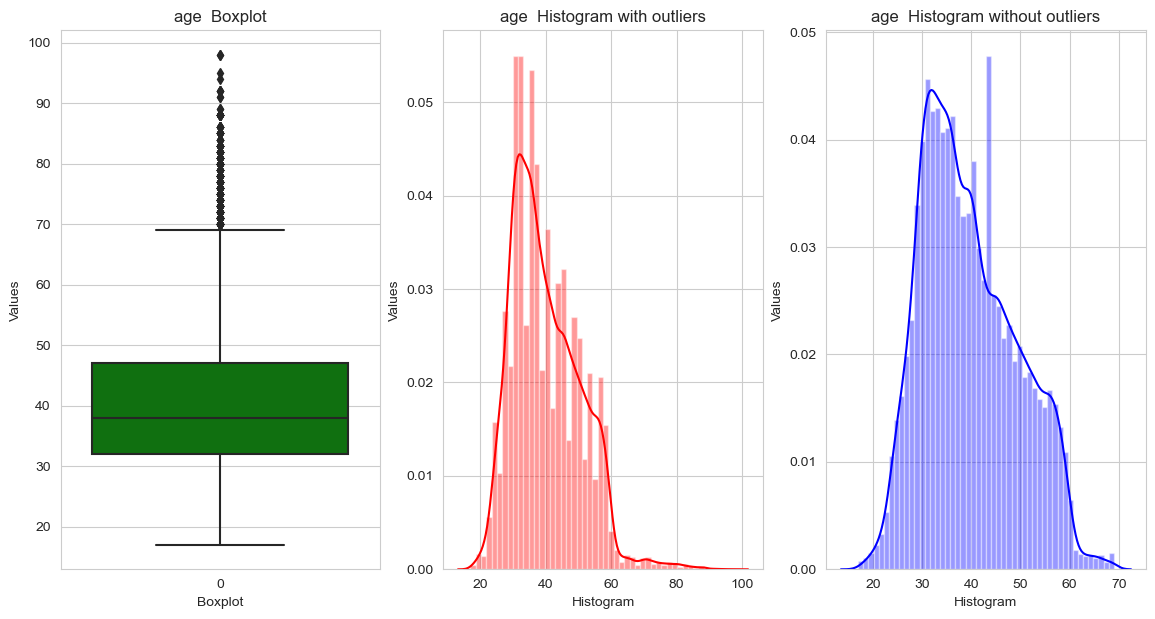

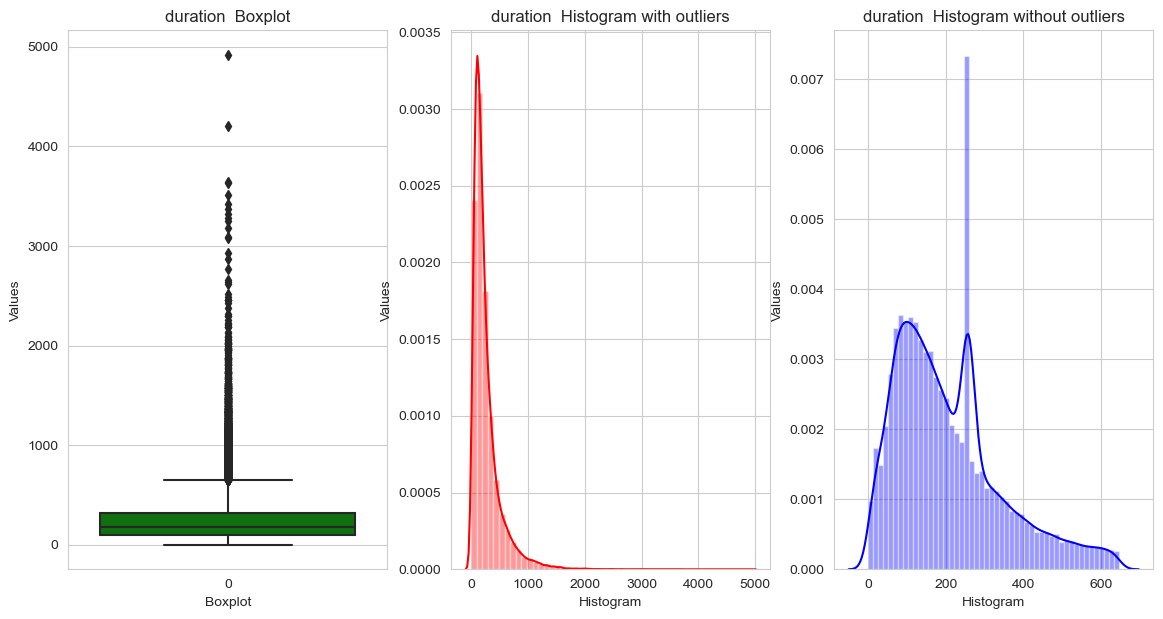

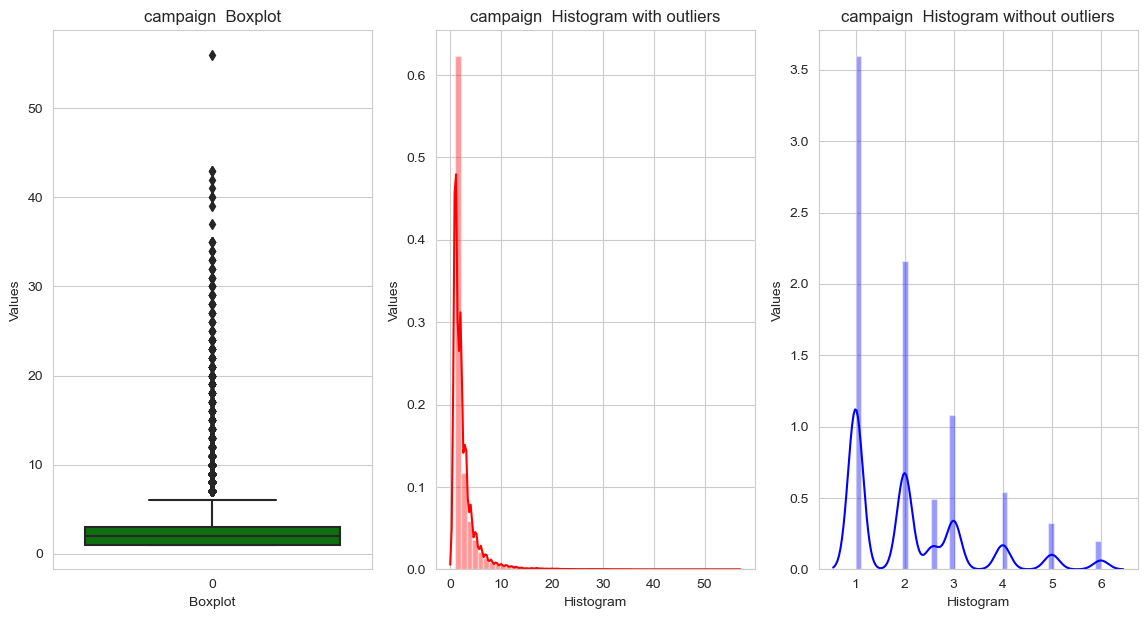

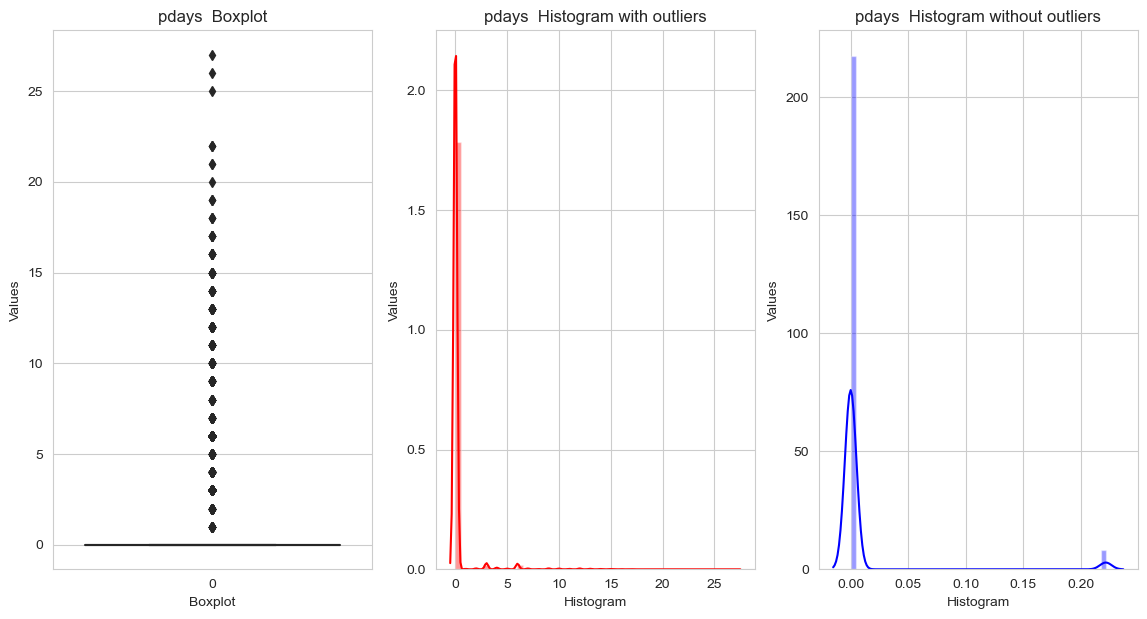

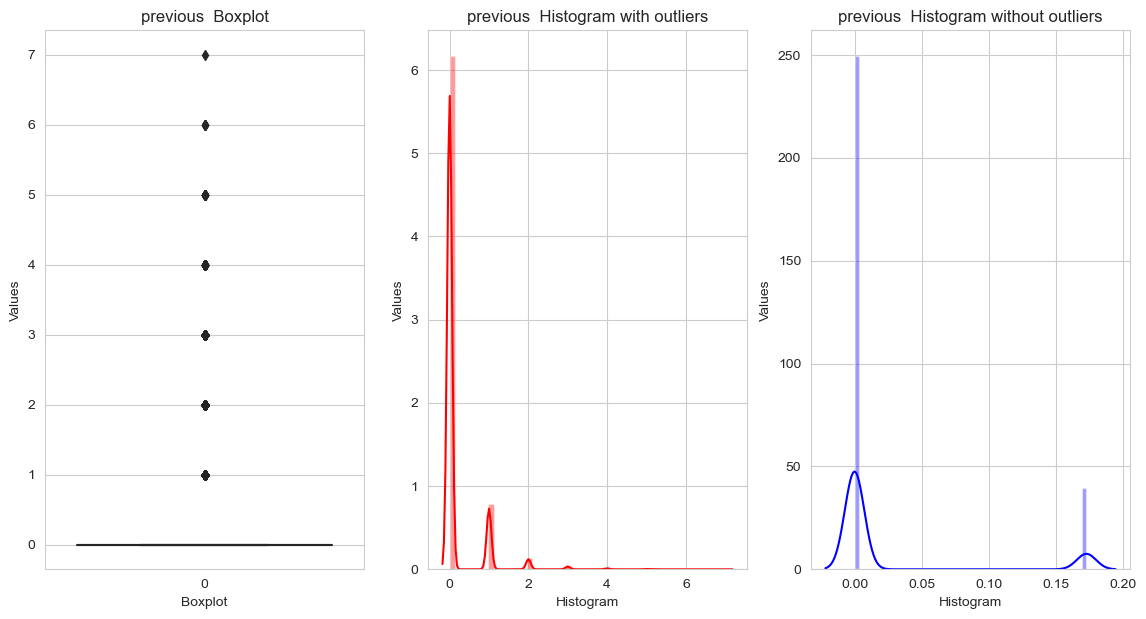

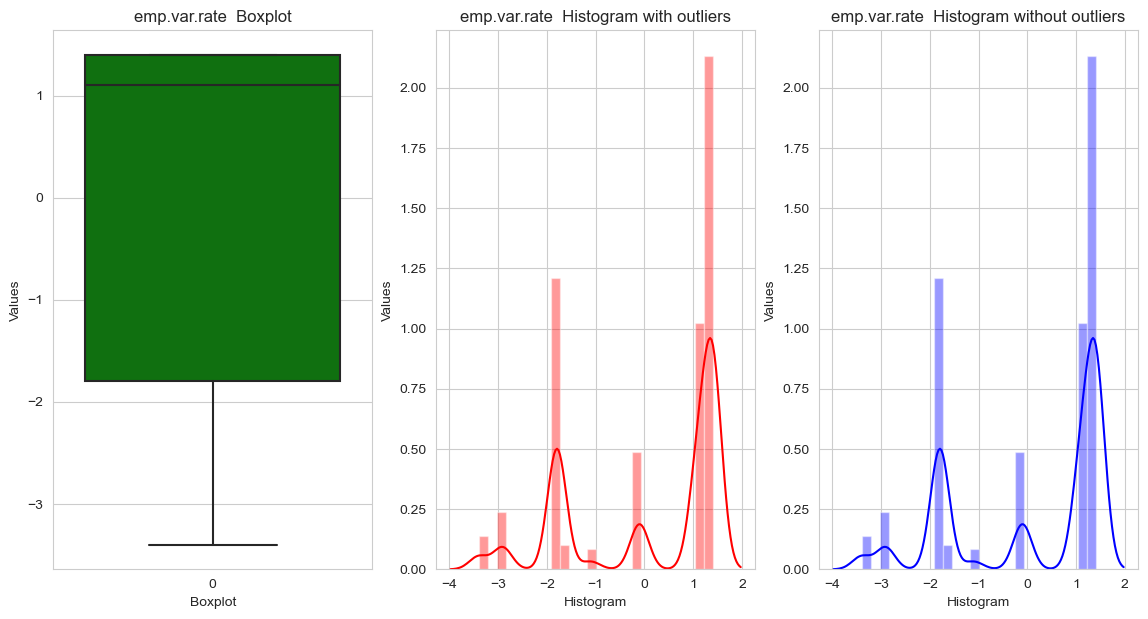

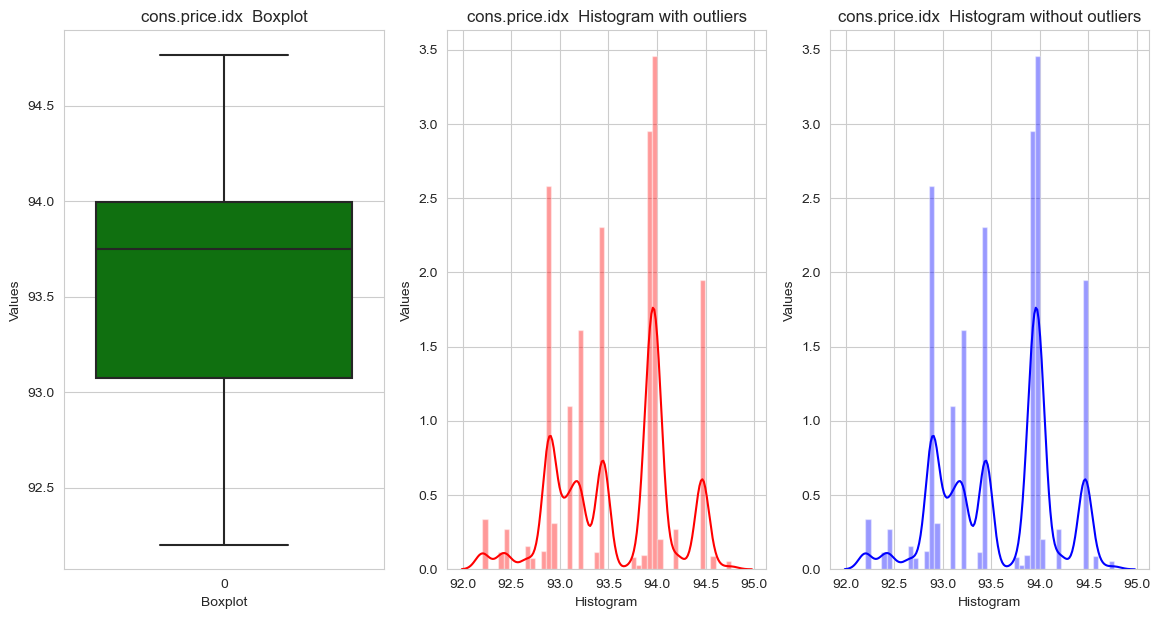

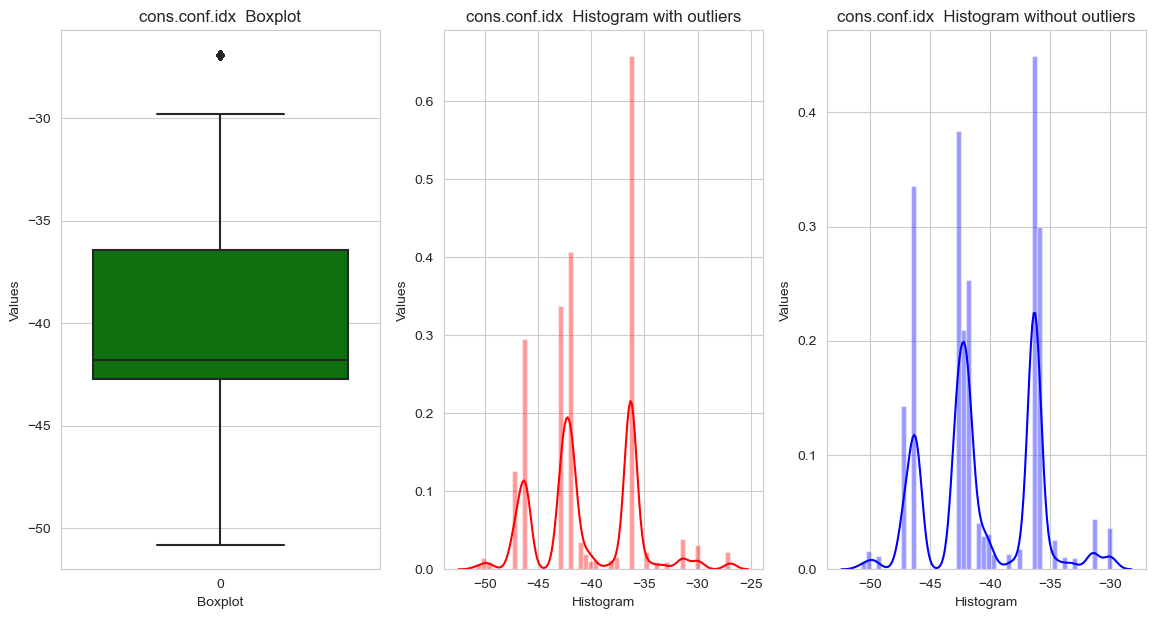

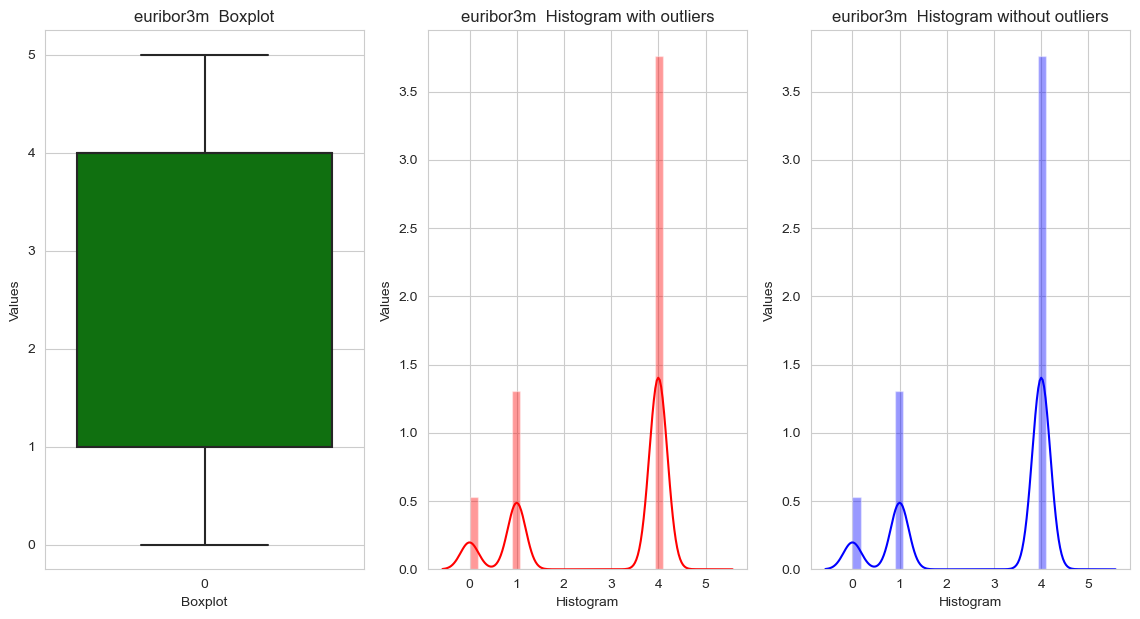

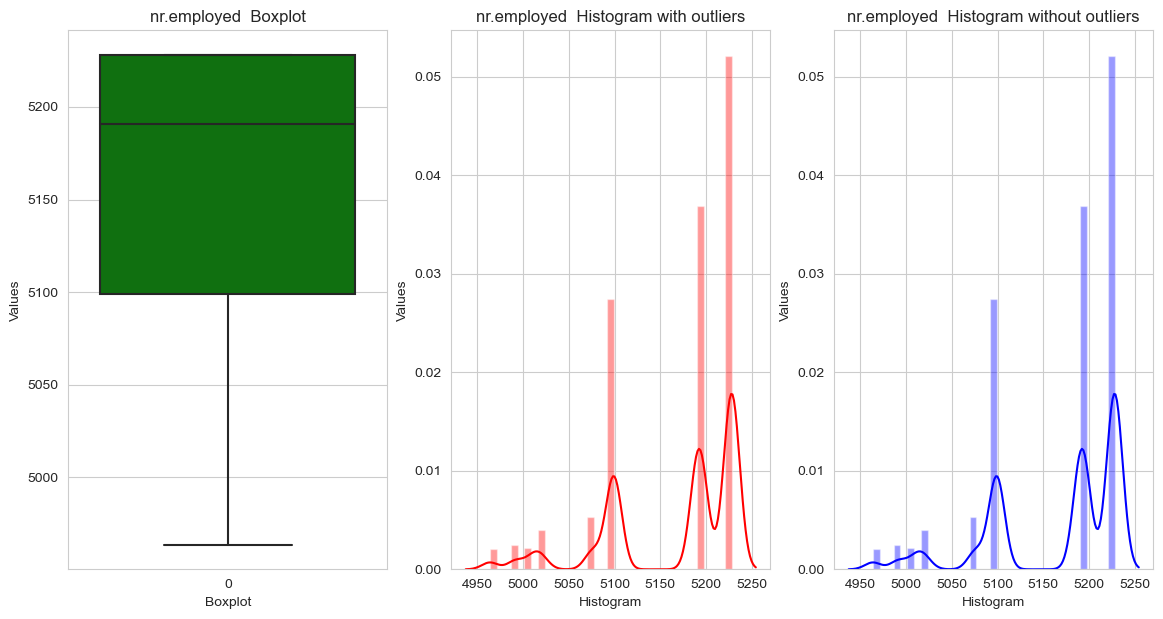

In [74]:
for col in numeric_cols.columns:
    graph_plots(numeric_cols, col)

Here, we have plotted a box plot, a histogram with outliers and a histogram without outliers for all the numeric columns to provide some or what related to a normal distribution and less skewness. Somewhat we are able to achieve a data without outliers and removed them from the original data.

Text(0.5, 1.0, 'Heatmap')

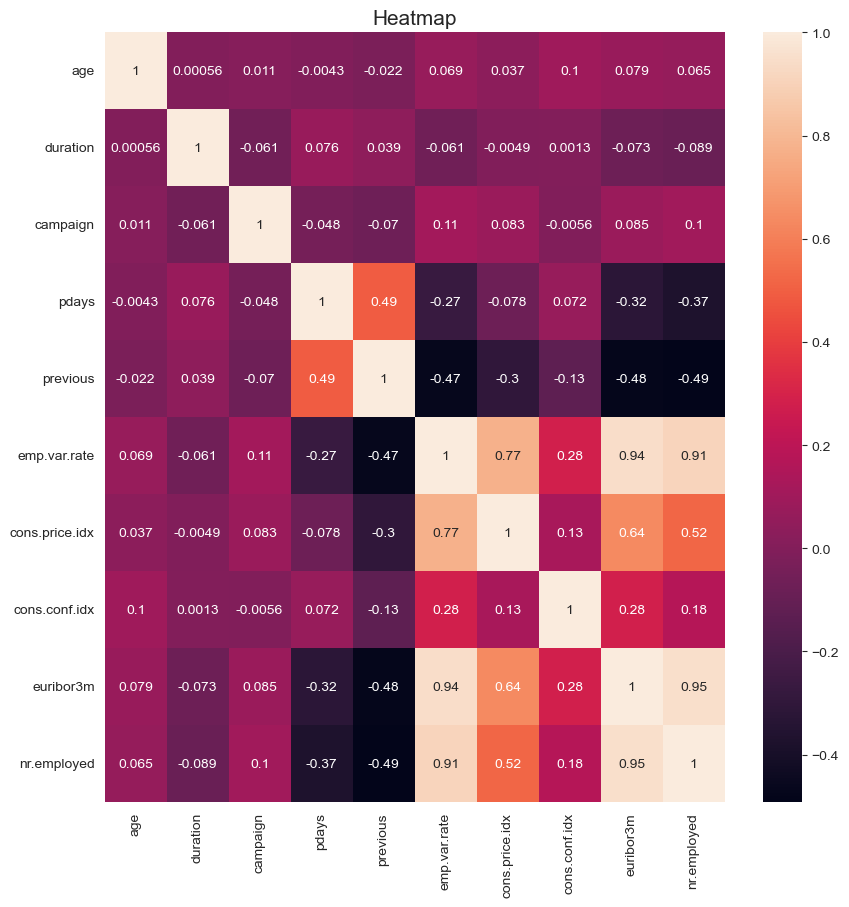

In [76]:
# Creating a correlation matrix by plotting a heatmap
plt.figure(figsize=(10, 10))
correlation = numeric_cols.corr()

sns.heatmap(correlation, annot=True)
plt.title('Heatmap', fontsize = 15)

**Features 'emp.var.rate' and 'cons.price.idx' is causing multicollinerity with 3 other features. Hence, it's possible to remove the unwanted features.**

In [77]:
# Dropping the columns
numeric_cols = numeric_cols.drop(['emp.var.rate', 'cons.price.idx'], axis = 1)
numeric_cols.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed
0,56.0,307.0,1.0,0.0,0.0,-36.4,4.0,5191.0
1,45.0,198.0,1.0,0.0,0.0,-36.4,4.0,5191.0
2,59.0,139.0,1.0,0.0,0.0,-36.4,4.0,5191.0
3,41.0,217.0,1.0,0.0,0.0,-36.4,4.0,5191.0
4,24.0,380.0,1.0,0.0,0.0,-36.4,4.0,5191.0


In [78]:
# Getting categorical data
cat_cols = new_data.select_dtypes(include=['object', 'category'])
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Customer_Response'],
      dtype='object')

In [79]:
# Checking the numerical and categorical data
print('Shape of Numerical Data:', numeric_cols.shape)
print('Shape of Categorical Data:', cat_cols.shape)

Shape of Numerical Data: (37072, 8)
Shape of Categorical Data: (37072, 11)


## Feature Engineering

Here, we are performing: 
- min-max normalization on Numerical Data 
- Label Encoding on Categorical data

In [80]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Creating an object
scaler = MinMaxScaler()
column = numeric_cols.columns

# Normalizing the numeric data
numeric_cols = scaler.fit_transform(numeric_cols)

# Creating a numerical dataframe
numeric_dataframe = pd.DataFrame(numeric_cols, columns = column)
numeric_dataframe.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed
0,0.750000,0.474498,0.0,0.0,0.0,0.685714,0.8,0.859735
1,0.538462,0.306028,0.0,0.0,0.0,0.685714,0.8,0.859735
2,0.807692,0.214838,0.0,0.0,0.0,0.685714,0.8,0.859735
3,0.461538,0.335394,0.0,0.0,0.0,0.685714,0.8,0.859735
4,0.134615,0.587326,0.0,0.0,0.0,0.685714,0.8,0.859735


In [81]:
# Transforming non-numerical labels to numerical labels using Label encoder
LE = LabelEncoder()

categorical_dataframe = pd.DataFrame()

for col in cat_cols.columns:
    categorical_dataframe[col] = LE.fit_transform(cat_cols[col])
    
categorical_dataframe.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Customer_Response
0,7,1,3,1,0,1,0,6,1,0,0
1,7,1,2,1,0,0,0,6,1,0,0
2,0,1,5,1,0,0,0,6,1,0,0
3,1,1,6,1,0,0,0,6,1,0,0
4,9,2,5,1,1,0,0,6,1,0,0


In [82]:
# Concatenating the data
training_data = pd.concat([numeric_dataframe, categorical_dataframe], axis=1)
training_data.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Customer_Response
0,0.750000,0.474498,0.0,0.0,0.0,0.685714,0.8,0.859735,7,1,3,1,0,1,0,6,1,0,0
1,0.538462,0.306028,0.0,0.0,0.0,0.685714,0.8,0.859735,7,1,2,1,0,0,0,6,1,0,0
2,0.807692,0.214838,0.0,0.0,0.0,0.685714,0.8,0.859735,0,1,5,1,0,0,0,6,1,0,0
3,0.461538,0.335394,0.0,0.0,0.0,0.685714,0.8,0.859735,1,1,6,1,0,0,0,6,1,0,0
4,0.134615,0.587326,0.0,0.0,0.0,0.685714,0.8,0.859735,9,2,5,1,1,0,0,6,1,0,0


Here, **training_data** is the new and cleaned data on which we will be working for training and analyzing the performance. 

In [83]:
# Checking the shape
training_data.shape

(37072, 19)

In [84]:
training_data.to_csv('TrainingData.csv', index = False)